In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def calculate_iou(segmentations, ground_truths):
    """
    Calculate IoU for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        iou_scores (list of floats): IoU scores for each pair of segmentation and ground truth.
        average_iou (float): Average IoU score.
    """
    iou_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        intersection = np.logical_and(seg, gt)
        union = np.logical_or(seg, gt)

        iou = np.sum(intersection) / np.sum(union)

        if math.isnan(iou):
            iou = 0

        iou_scores.append(iou)

    average_iou = np.mean(iou_scores)

    return iou_scores, average_iou

In [3]:
def calculate_dice_coefficient(segmentations, ground_truths):
    """
    Calculate Dice coefficient for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        dice_coefficients (list of floats): Dice coefficients for each pair of segmentation and ground truth.
        average_dice_coefficient (float): Average Dice coefficient.
    """
    dice_coefficients = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        intersection = np.logical_and(seg, gt)
        dice = (2.0 * np.sum(intersection)) / (np.sum(seg) + np.sum(gt))

        if math.isnan(dice):
            dice = 0

        dice_coefficients.append(dice)


    average_dice_coefficient = np.mean(dice_coefficients)

    return dice_coefficients, average_dice_coefficient

In [4]:
def calculate_accuracy(segmentations, ground_truths):
    """
    Calculate accuracy for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        accuracy_scores (list of floats): Accuracy scores for each pair of segmentation and ground truth.
        average_accuracy (float): Average accuracy score.
    """
    accuracy_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        correct_pixels = np.sum(seg == gt)
        total_pixels = seg.size
        accuracy = correct_pixels / total_pixels
        accuracy_scores.append(accuracy)

    average_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, average_accuracy

In [5]:
def calculate_precision(segmentations, ground_truths):
    """
    Calculate precision for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        precision_scores (list of floats): Precision scores for each pair of segmentation and ground truth.
        average_precision (float): Average precision score.
    """
    precision_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        true_positives = np.sum(np.logical_and(seg == 1, gt == 1))
        false_positives = np.sum(np.logical_and(seg == 1, gt == 0))
        precision = true_positives / (true_positives + false_positives)

        if math.isnan(precision):
            precision = 0

        precision_scores.append(precision)

    average_precision = np.mean(precision_scores)

    return precision_scores, average_precision

In [6]:
def calculate_recall(segmentations, ground_truths):
    """
    Calculate recall for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        recall_scores (list of floats): Recall scores for each pair of segmentation and ground truth.
        average_recall (float): Average recall score.
    """
    recall_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        true_positives = np.sum(np.logical_and(seg == 1, gt == 1))
        false_negatives = np.sum(np.logical_and(seg == 0, gt == 1))
        recall = true_positives / (true_positives + false_negatives)

        if math.isnan(recall):
            recall = 0

        recall_scores.append(recall)

    average_recall = np.mean(recall_scores)

    return recall_scores, average_recall

In [7]:
def calculate_f1_score(segmentations, ground_truths):
    """
    Calculate F1 score for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        f1_scores (list of floats): F1 scores for each pair of segmentation and ground truth.
        average_f1 (float): Average F1 score.
    """
    f1_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        true_positives = np.sum(np.logical_and(seg == 1, gt == 1))
        false_positives = np.sum(np.logical_and(seg == 1, gt == 0))
        false_negatives = np.sum(np.logical_and(seg == 0, gt == 1))
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1 = 2 * (precision * recall) / (precision + recall)

        if math.isnan(f1):
            f1 = 0

        f1_scores.append(f1)

    average_f1 = np.mean(f1_scores)

    return f1_scores, average_f1

In [8]:
def calculate_f05_score(segmentations, ground_truths):
    """
    Calculate F0.5 score for a list of binary segmentations and their ground truth images.

    Args:
        segmentations (list of numpy arrays): List of binary segmentation masks (0s and 1s).
        ground_truths (list of numpy arrays): List of ground truth binary masks (0s and 1s).

    Returns:
        f05_scores (list of floats): F0.5 scores for each pair of segmentation and ground truth.
        average_f05 (float): Average F0.5 score.
    """
    f05_scores = []

    for seg, gt in zip(segmentations, ground_truths):
        seg = seg > 0.5
        true_positives = np.sum(np.logical_and(seg == 1, gt == 1))
        false_positives = np.sum(np.logical_and(seg == 1, gt == 0))
        false_negatives = np.sum(np.logical_and(seg == 0, gt == 1))
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)

        beta = 0.5  # Adjust this value to change the weighting between precision and recall
        f05 = ((1 + beta**2) * precision * recall) / ((beta**2 * precision) + recall)

        if math.isnan(f05):
            f05 = 0

        f05_scores.append(f05)

    average_f05 = np.mean(f05_scores)

    return f05_scores, average_f05

In [9]:
PAPYRI_BASE= '../../Datasets/alpub_v2/papyri_images/seg_mask_otsu_256_200'

In [10]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

In [11]:
torch.cuda.empty_cache()

In [12]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
# Define transformations to be applied to the images (if needed)
# You can customize these transformations based on your specific requirements
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to a fixed size (e.g., 256x256)
    transforms.Grayscale(), # Greyscale the images
    transforms.ToTensor(),         # Convert the image to a PyTorch tensor
])

# Create the ImageFolder dataset
dataset = ImageFolder(root=PAPYRI_BASE, transform=transform)

# Define the ratio of data to be used for training, validation, and testing
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate the number of samples for each set based on the ratios
num_samples = len(dataset)
num_train_samples = int(train_ratio * num_samples)
num_val_samples = int(val_ratio * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# Use random_split to split the dataset into training, validation, and test sets
train_set, val_set, test_set = random_split(dataset, [num_train_samples, num_val_samples, num_test_samples])

# Create the DataLoaders for each set
batch_size = 16
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, pin_memory=True)

In [14]:
# Assuming you have already created the DataLoader (train_loader, val_loader, or test_loader)

# Get the number of batches in the DataLoader
num_batches = len(val_loader)  # Change 'train_loader' to 'val_loader' or 'test_loader' as needed

# Get the batch size used in the DataLoader
batch_size = val_loader.batch_size  # Change 'train_loader' to 'val_loader' or 'test_loader' as needed

# Calculate the total number of samples in the DataLoader
total_samples = num_batches * batch_size

print("Number of batches:", num_batches)
print("Batch size:", batch_size)
print("Total number of samples:", total_samples)

Number of batches: 272
Batch size: 16
Total number of samples: 4352


In [15]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as func

from torch.utils.data import DataLoader, Dataset, Subset

In [16]:
#Simple UNet Model without skip connections. Works with 256x256 image size

class UNetWithoutSkipConnections(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_prob):
        super(UNetWithoutSkipConnections, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(

            nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=1),#256x256x16
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1), #256x256x16
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #128x128x16

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),#128x128x32
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), #128x128x32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #64x64x32

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),#64x64x64
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1), #64x64x64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #32x32x64

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),#32x32x128
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1), #32x32x128
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #16x16x128

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),#16x16x256
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), #16x16x256
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #8x8x256

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),#8x8x512
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), #8x8x512
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #4x4x512
        )

        # Decoder
        self.decoder = nn.Sequential(

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), #4x4x512
            nn.Upsample(scale_factor=2),#8x8x512
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1), #8x8x256
            nn.Upsample(scale_factor=2),#16x16x256
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),#16x16x128
            nn.Upsample(scale_factor=2),#32x32x128
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),#32x32x64
            nn.Upsample(scale_factor=2), #64x64x64
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),#64x64x32
            nn.Upsample(scale_factor=2), #128x128x32
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),#128x128x16
            nn.Upsample(scale_factor=2), #256x256x16
            nn.ReLU(),
            nn.Dropout2d(p=dropout_prob),

            nn.Conv2d(16, out_channels, kernel_size=3, stride=1, padding=1), #256x256x1
            nn.Sigmoid()
        )

    def forward(self, x):
        #print(x.shape)
        x = self.encoder(x)
        #print(x.shape)
        x = self.decoder(x)
        #print(x.shape)
        return x

In [17]:
test_loader = DataLoader(test_set, batch_size=1, shuffle=False, pin_memory=True)

In [18]:
model = torch.load('../models/papyri_autoencoder_256_upsample_u_net_greyscale_epoch_30_batch_16.pt')
# Set the model to evaluation mode
model.eval()  # Set the model to evaluation mode

res = []
lbls = []

with torch.no_grad():
    for batch in test_loader:

        img, lbl = batch

        # Perform inference
        out = model(img.to(device))

        lbls.append(img.cpu().detach().numpy())
        res.append(out.cpu().detach().numpy())

In [37]:
iou_scores, average_iou = calculate_iou(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(iou_scores):
    print(f"IoU for pair {i + 1}: {iou:.4f}")

print(f"Average IoU: {average_iou:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


IoU for pair 1: 0.8061
IoU for pair 2: 0.7586
IoU for pair 3: 0.7724
IoU for pair 4: 0.7185
IoU for pair 5: 0.8910
IoU for pair 6: 0.7284
IoU for pair 7: 0.9394
IoU for pair 8: 0.8192
IoU for pair 9: 0.3397
IoU for pair 10: 0.7760
IoU for pair 11: 0.7832
IoU for pair 12: 0.7579
IoU for pair 13: 0.5605
IoU for pair 14: 0.7960
IoU for pair 15: 0.7093
IoU for pair 16: 0.9582
IoU for pair 17: 0.6565
IoU for pair 18: 0.7130
IoU for pair 19: 0.8441
IoU for pair 20: 0.7979
IoU for pair 21: 0.7403
IoU for pair 22: 0.7615
IoU for pair 23: 0.7474
IoU for pair 24: 0.7909
IoU for pair 25: 0.8231
IoU for pair 26: 0.7668
IoU for pair 27: 0.8158
IoU for pair 28: 0.7647
IoU for pair 29: 0.8533
IoU for pair 30: 0.0000
IoU for pair 31: 0.7276
IoU for pair 32: 0.6878
IoU for pair 33: 0.7326
IoU for pair 34: 0.0000
IoU for pair 35: 0.8378
IoU for pair 36: 0.7743
IoU for pair 37: 0.7289
IoU for pair 38: 0.8039
IoU for pair 39: 0.6267
IoU for pair 40: 0.8212
IoU for pair 41: 0.8083
IoU for pair 42: 0.8010
I

In [41]:
idx = 250

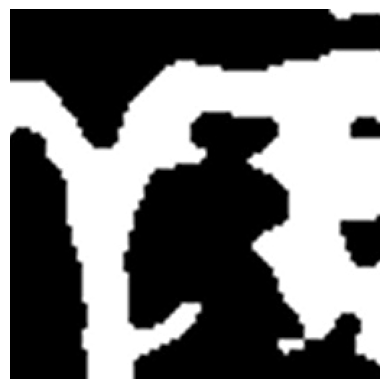

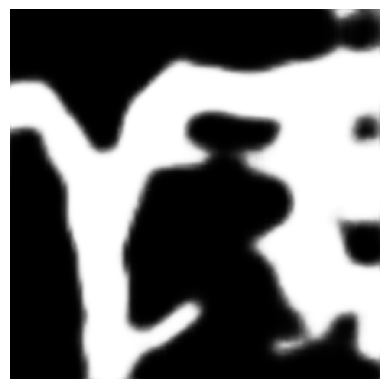

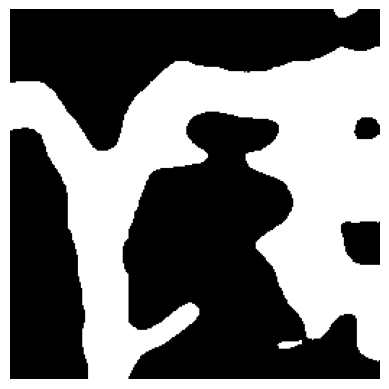

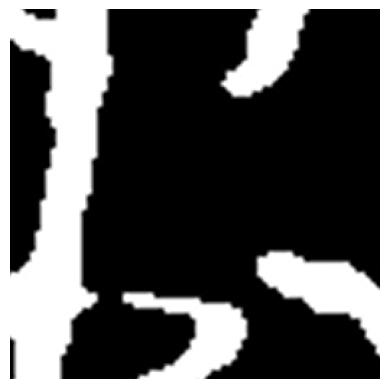

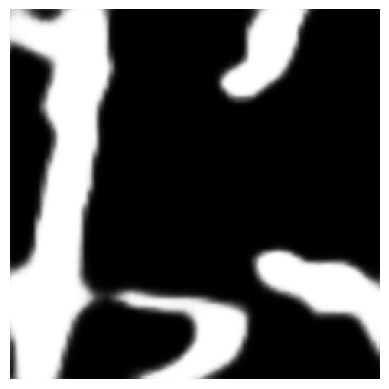

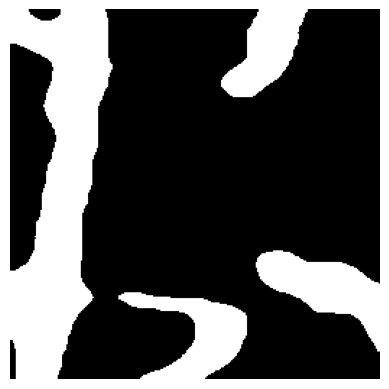

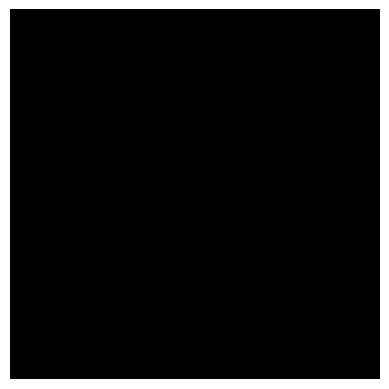

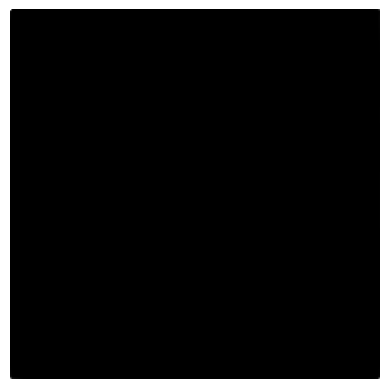

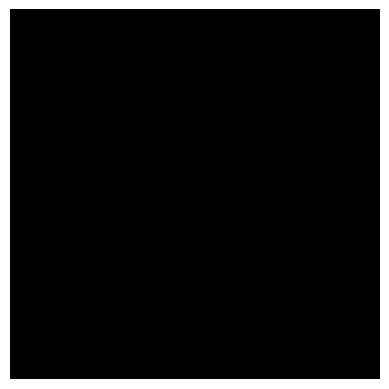

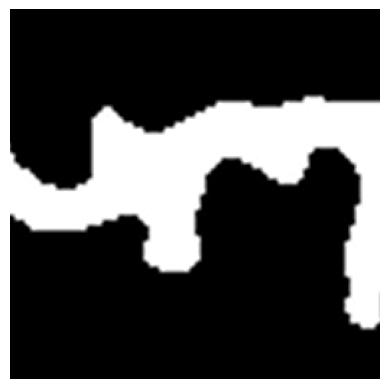

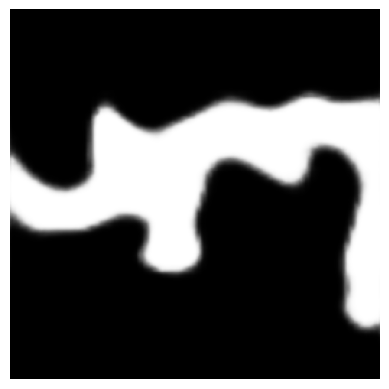

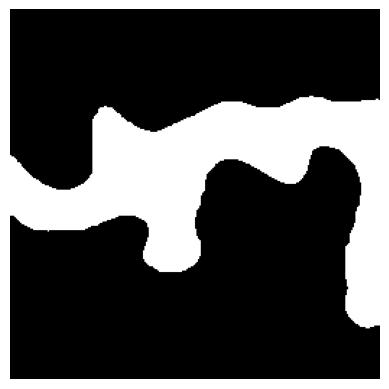

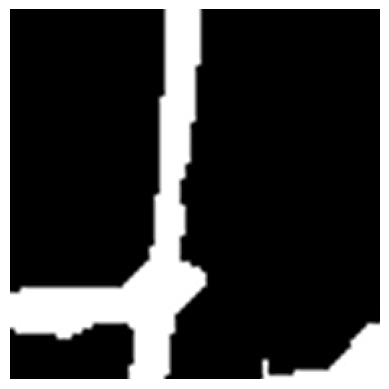

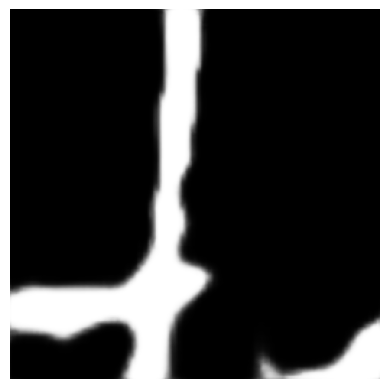

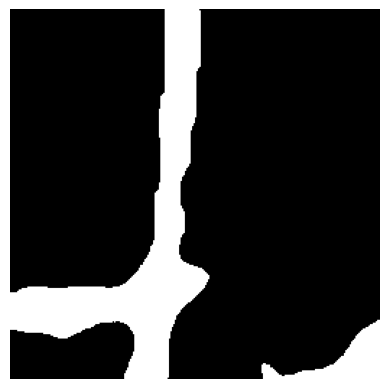

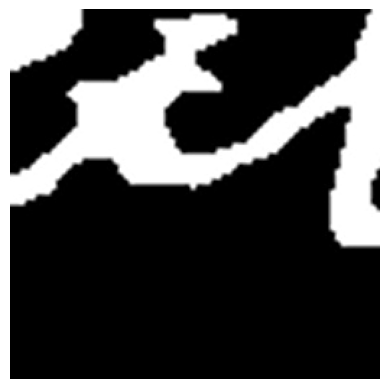

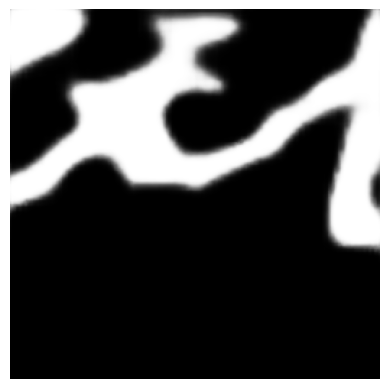

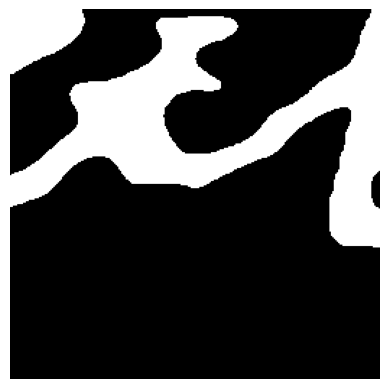

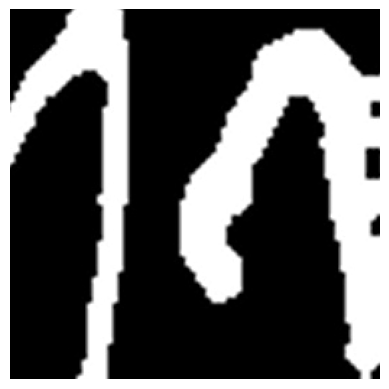

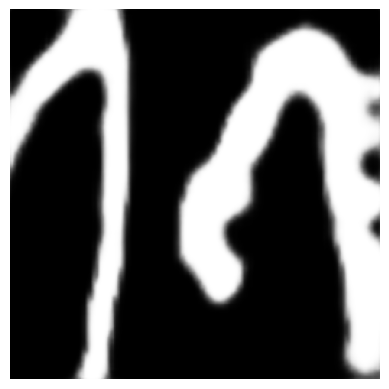

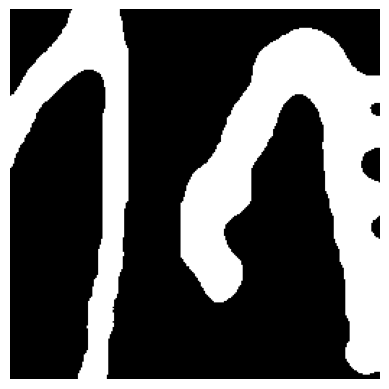

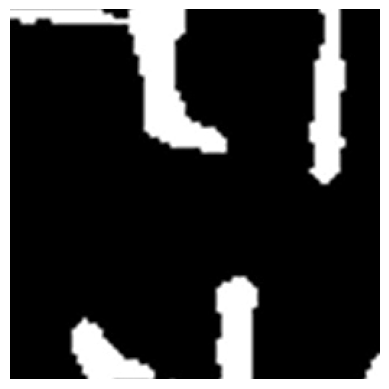

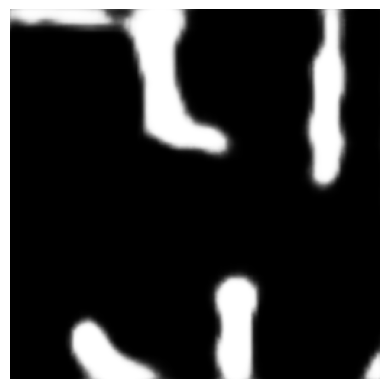

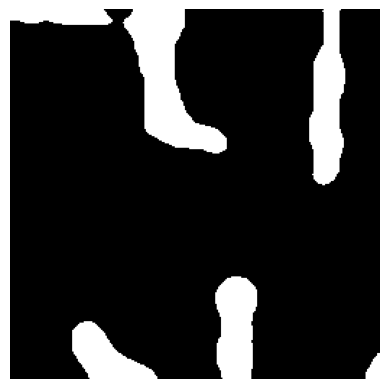

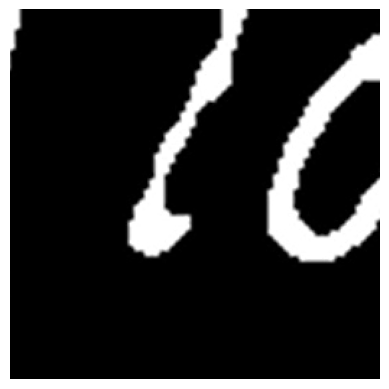

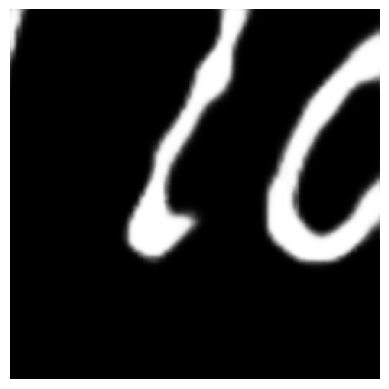

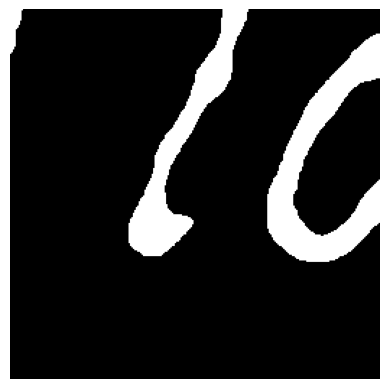

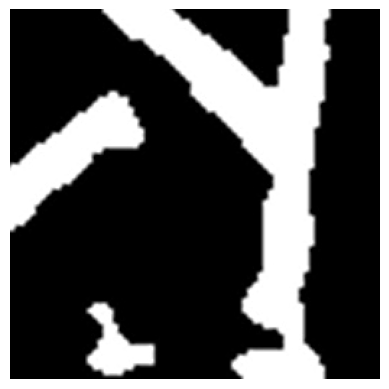

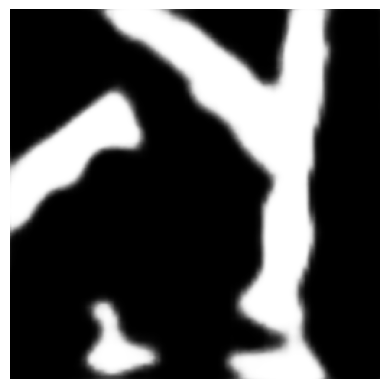

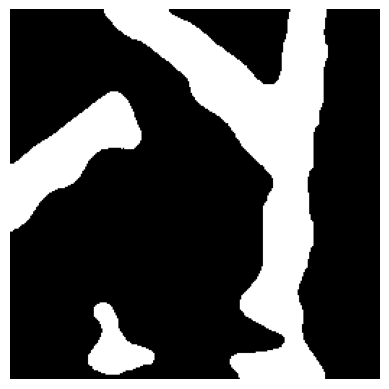

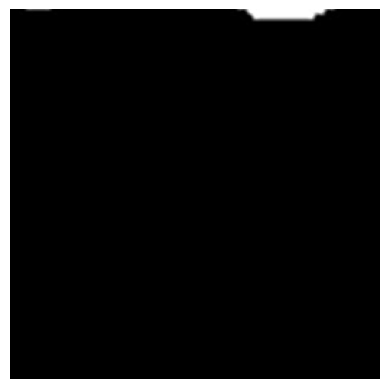

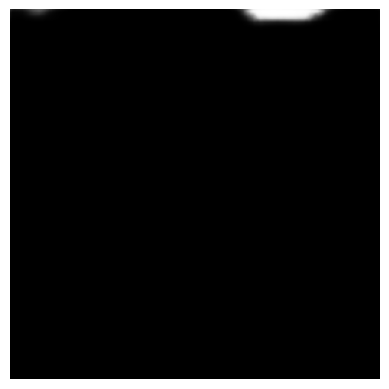

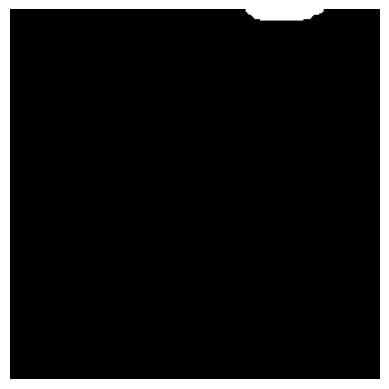

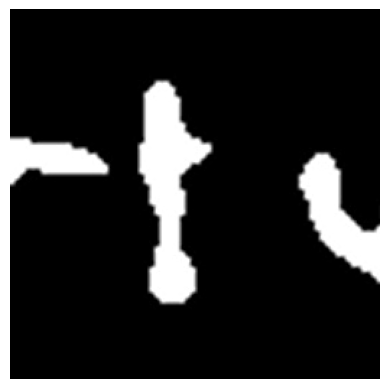

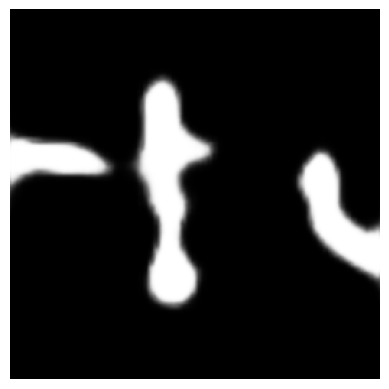

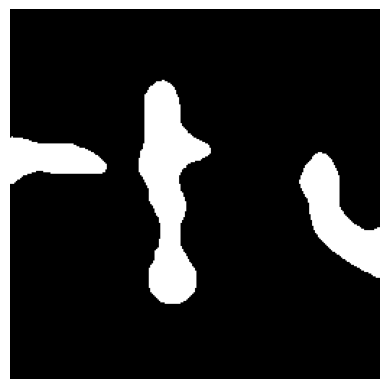

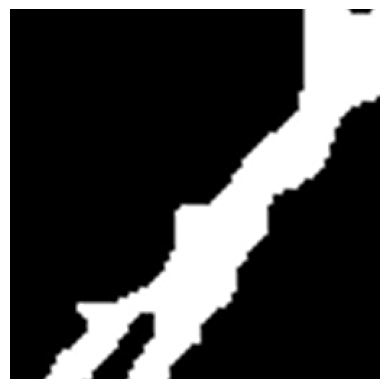

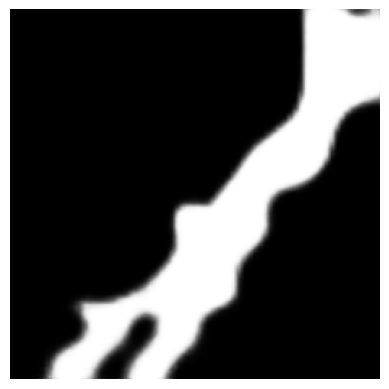

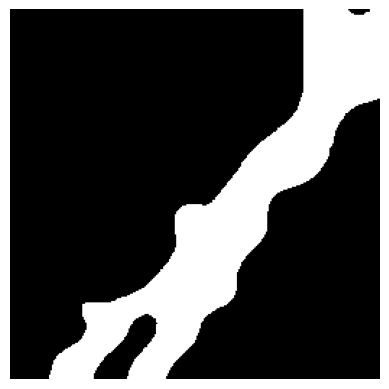

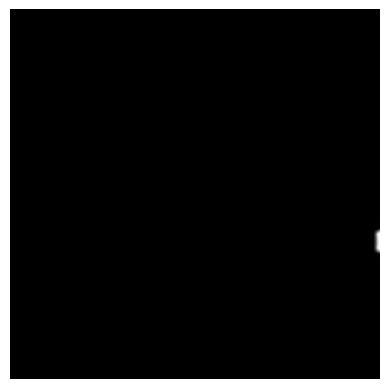

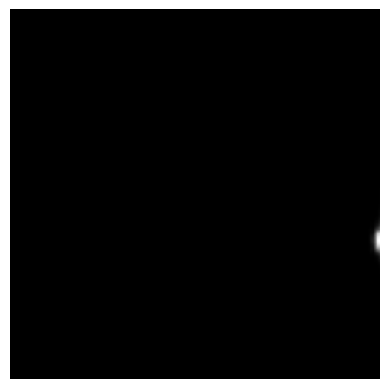

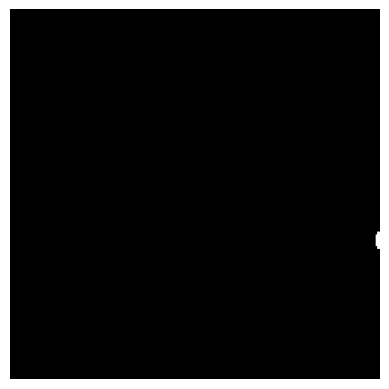

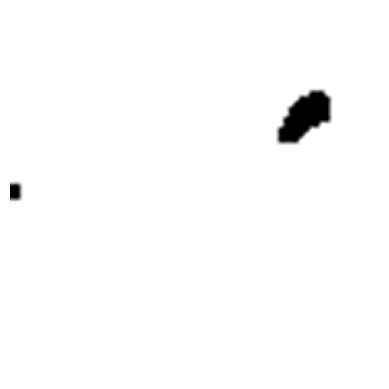

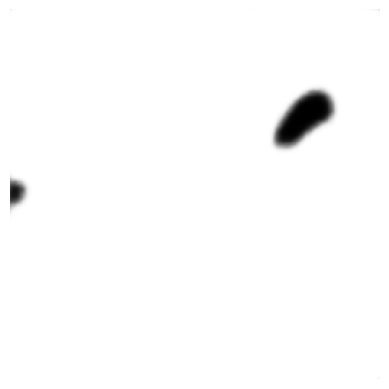

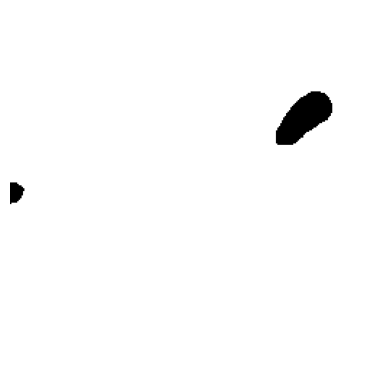

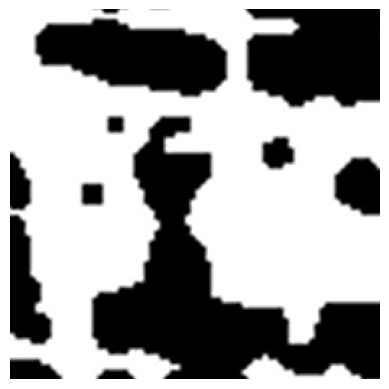

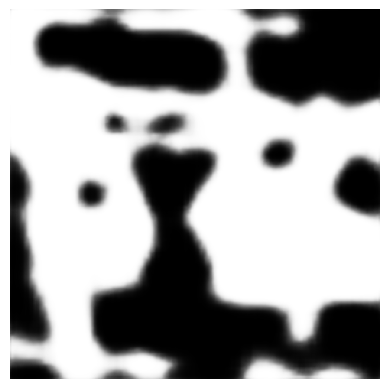

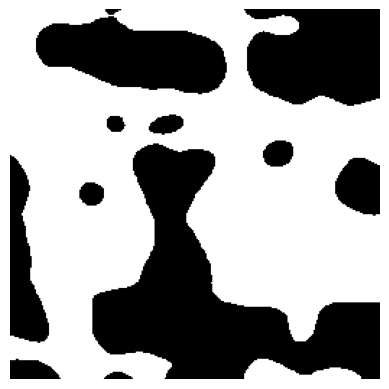

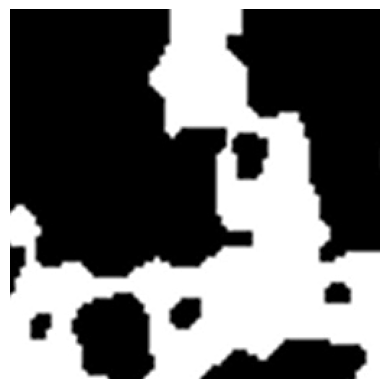

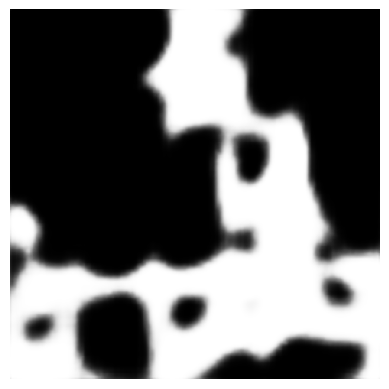

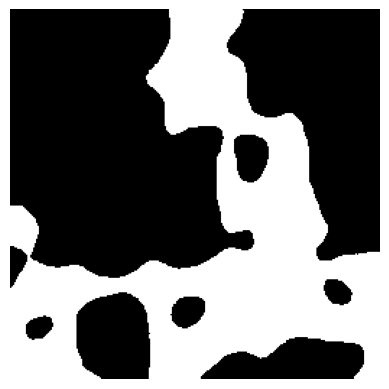

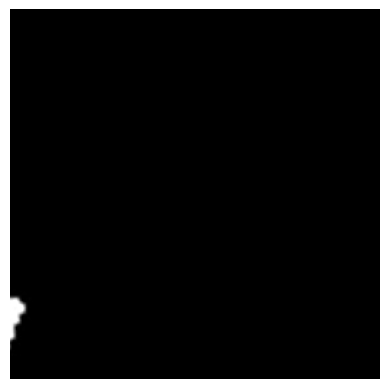

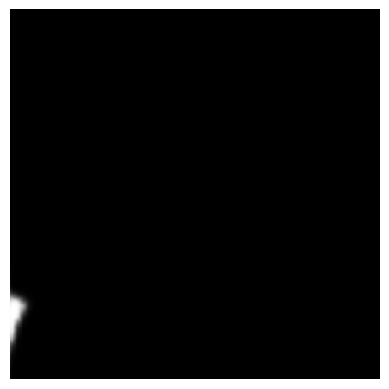

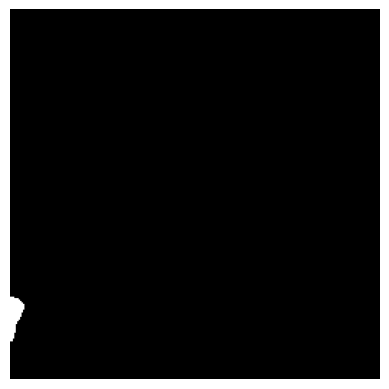

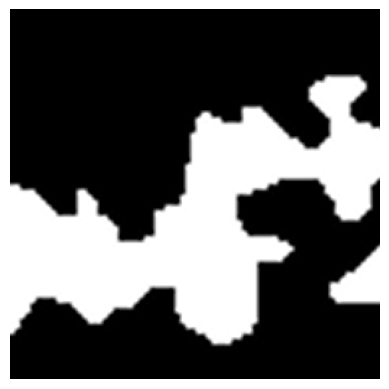

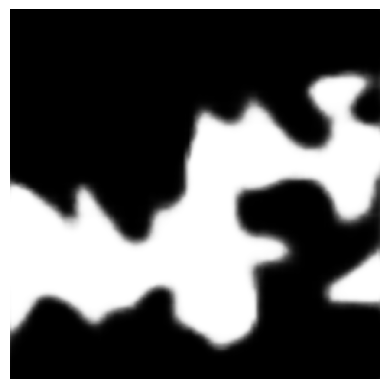

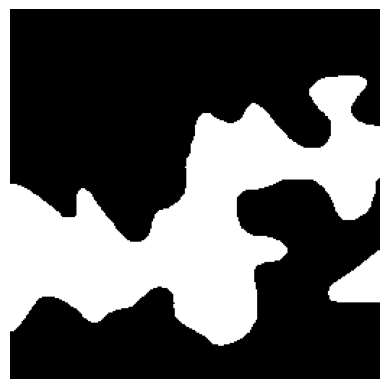

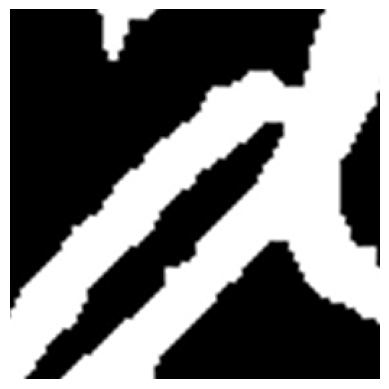

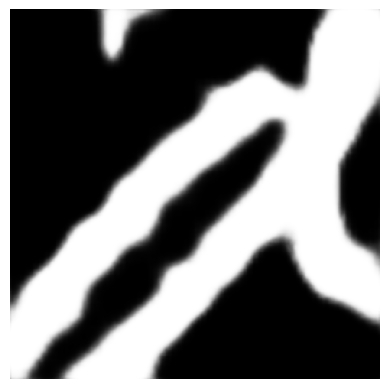

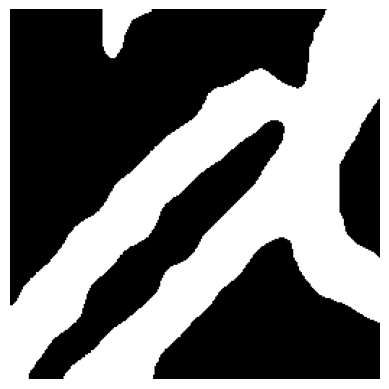

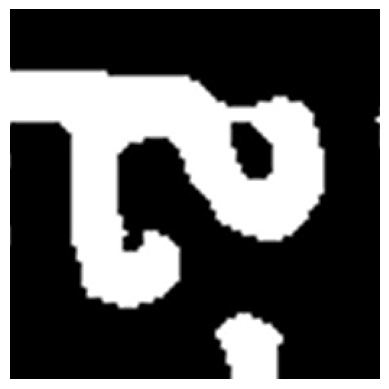

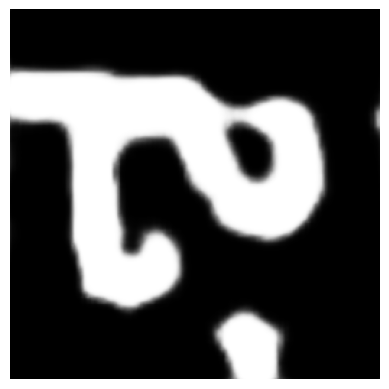

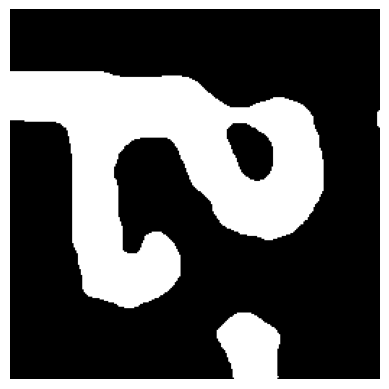

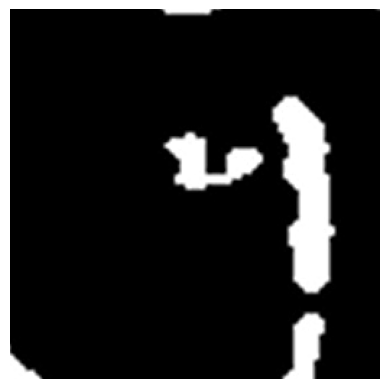

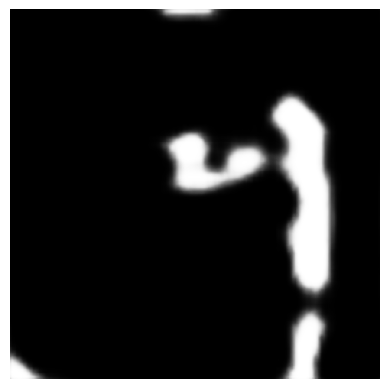

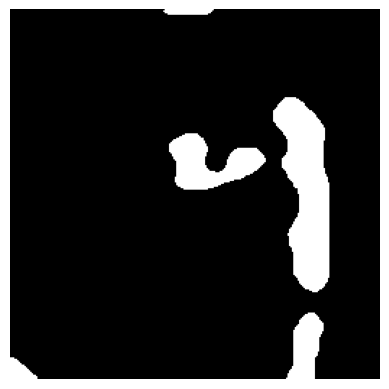

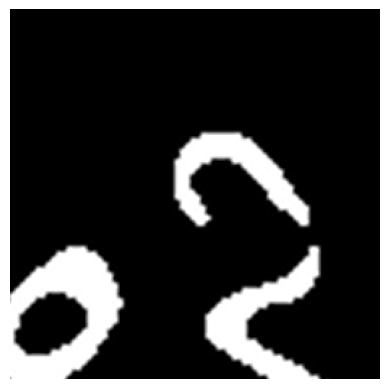

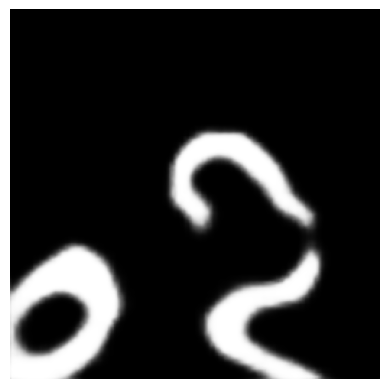

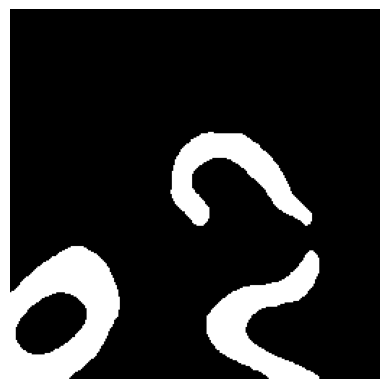

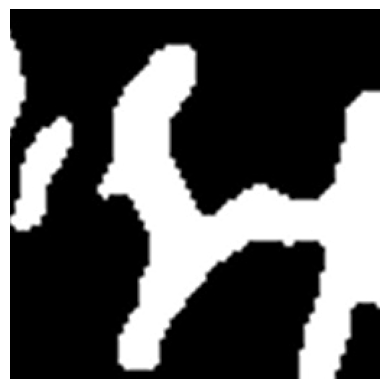

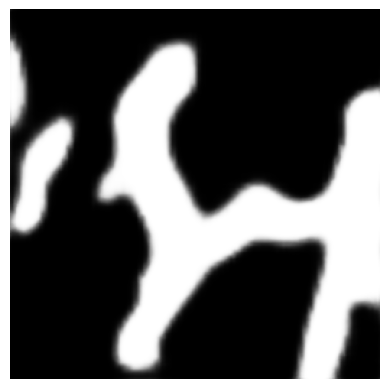

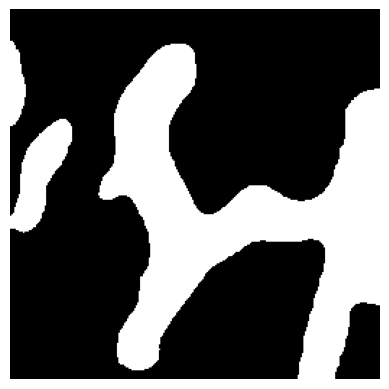

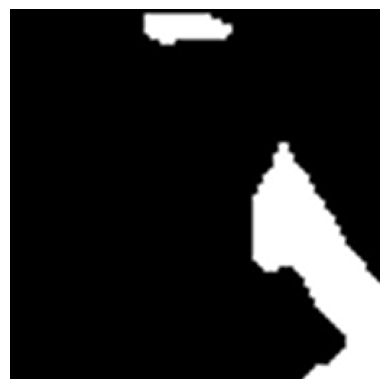

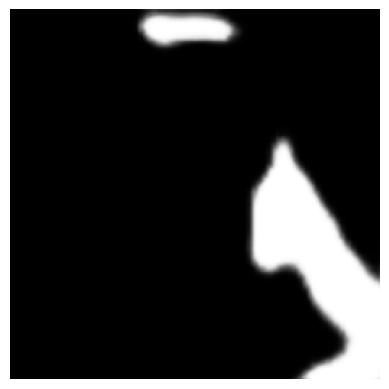

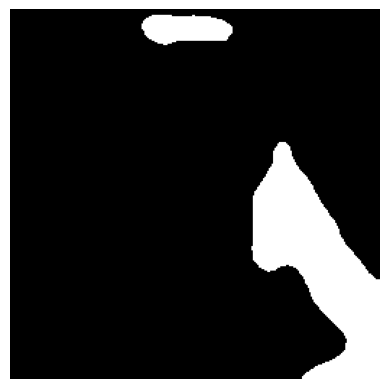

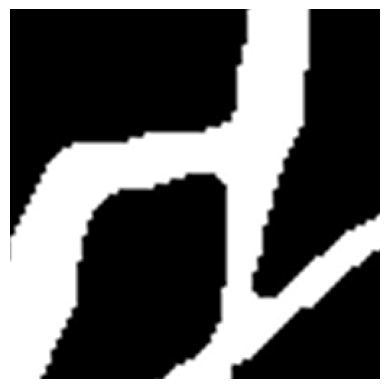

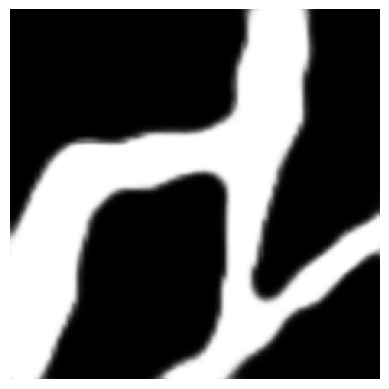

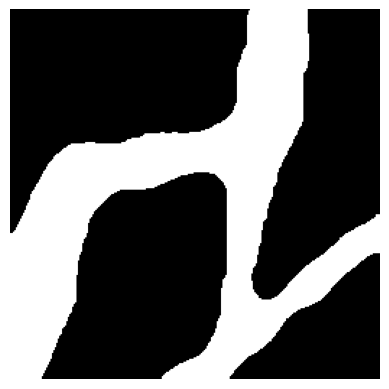

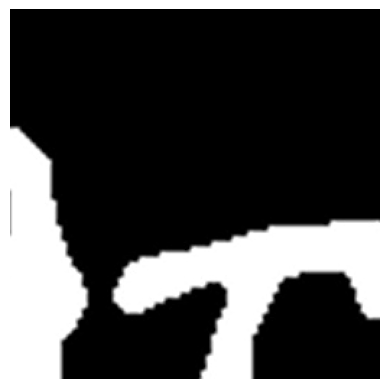

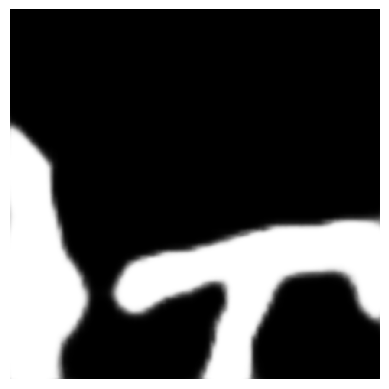

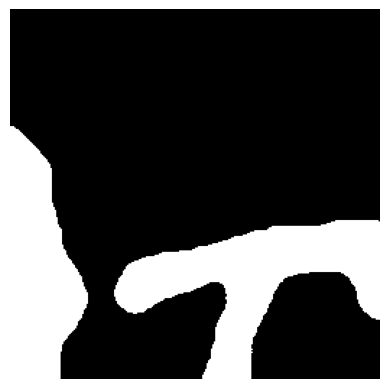

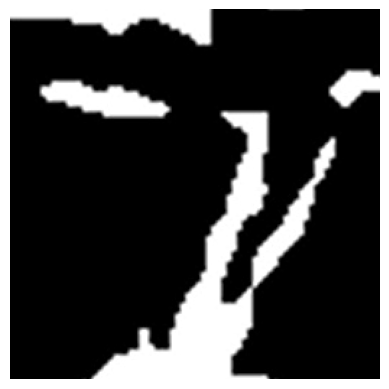

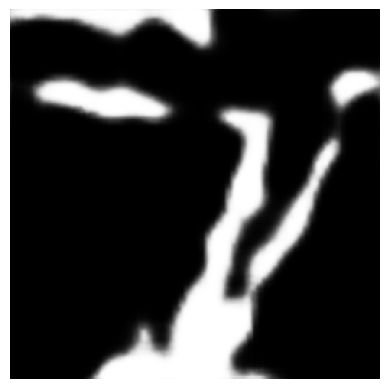

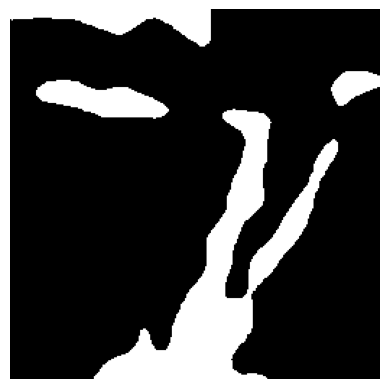

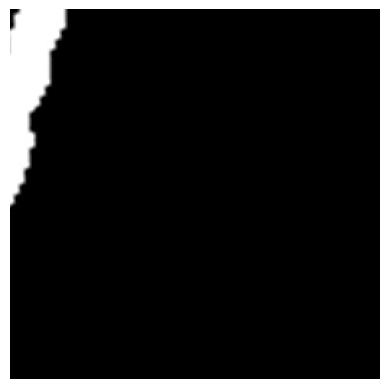

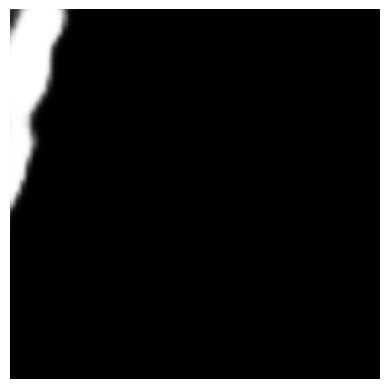

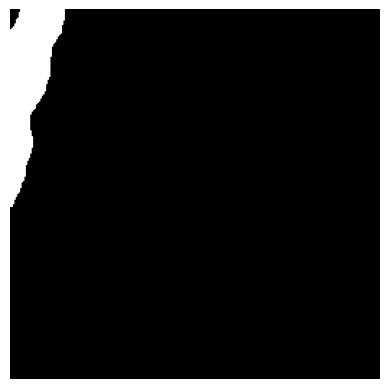

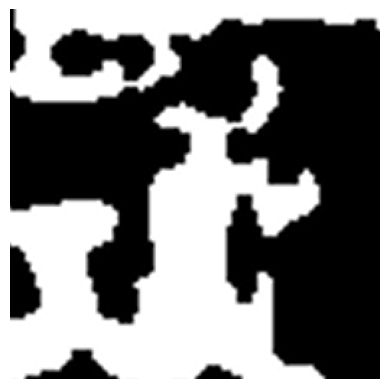

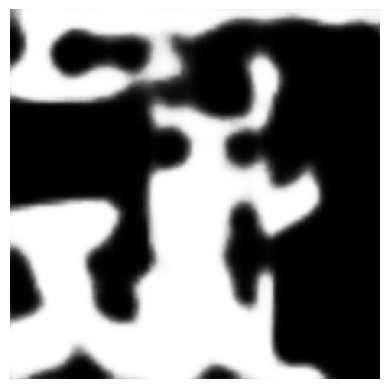

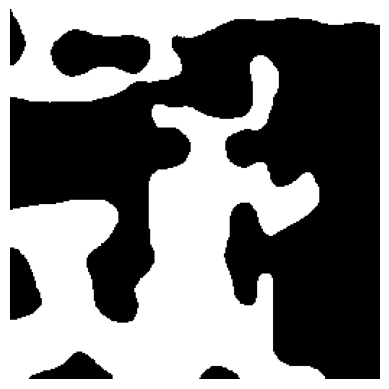

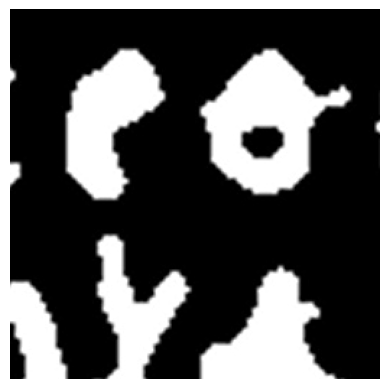

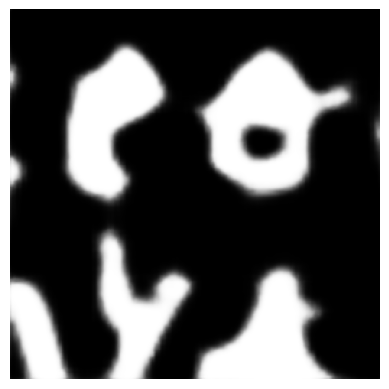

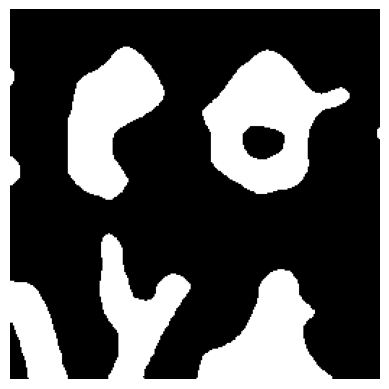

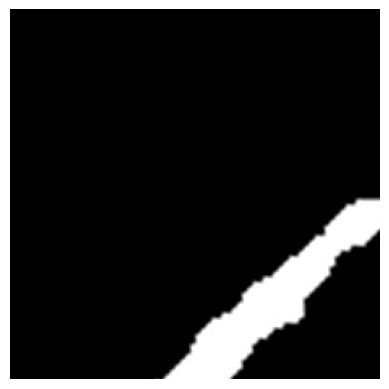

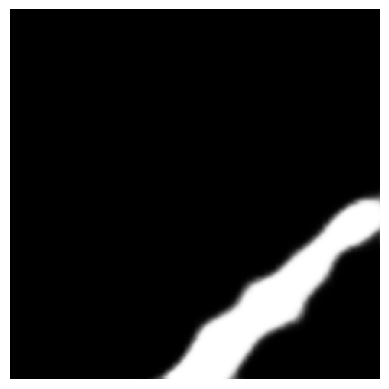

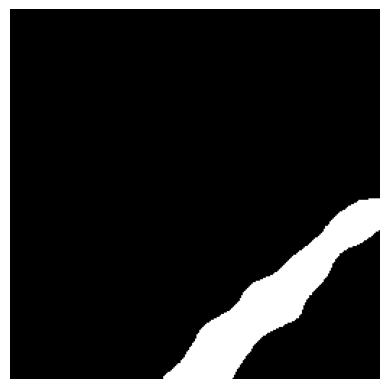

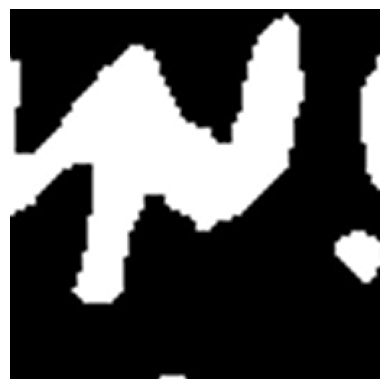

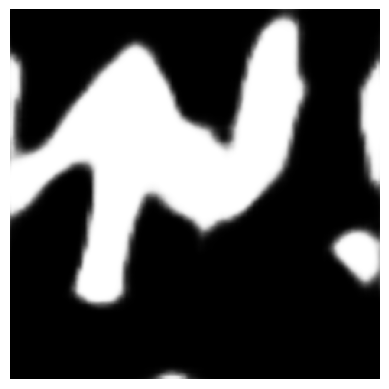

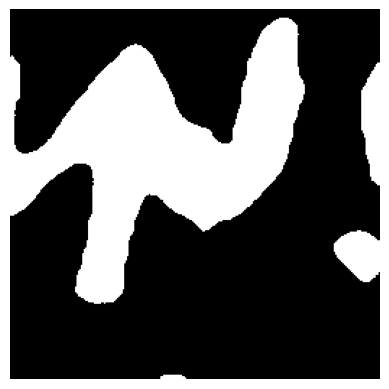

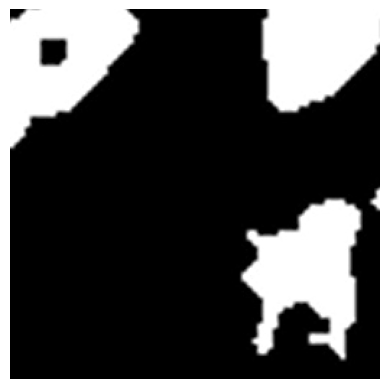

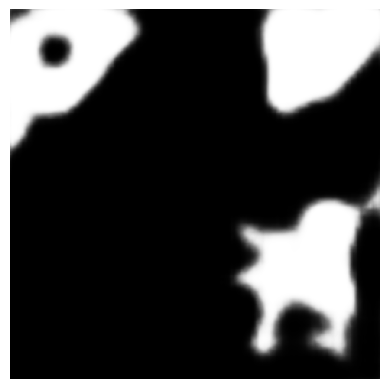

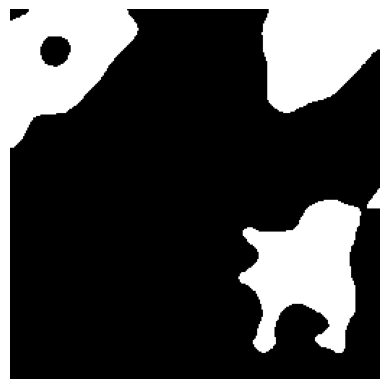

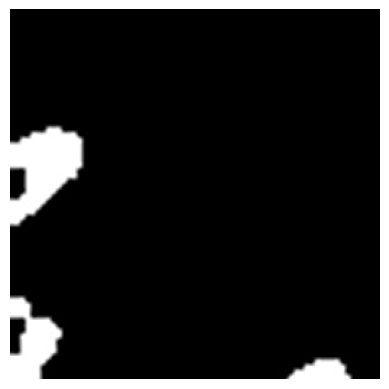

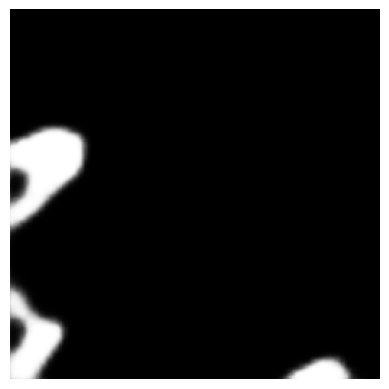

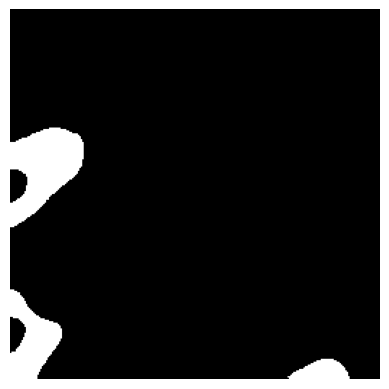

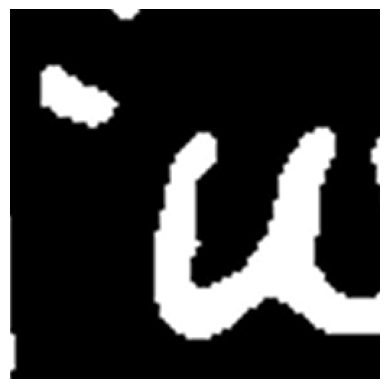

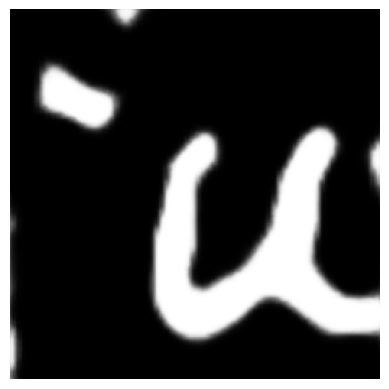

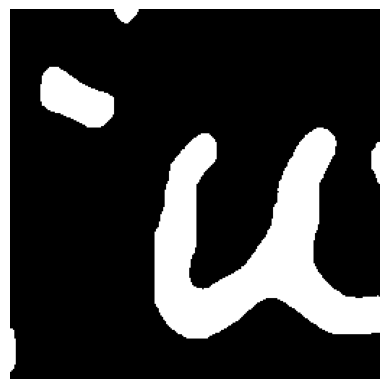

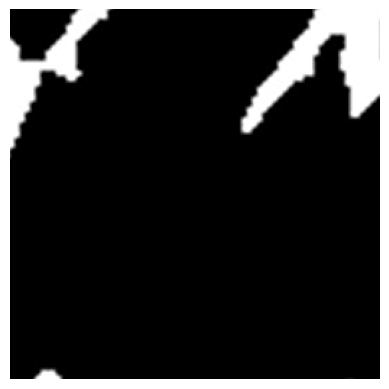

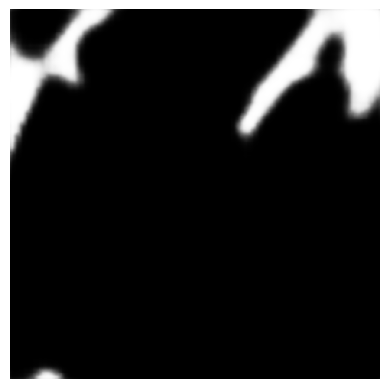

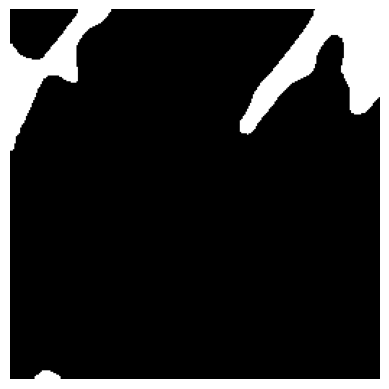

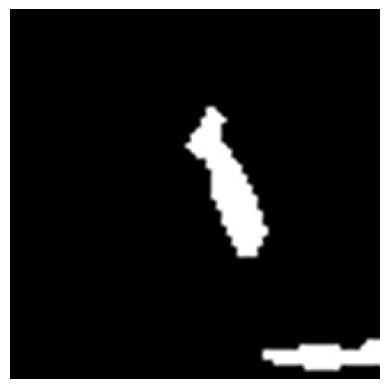

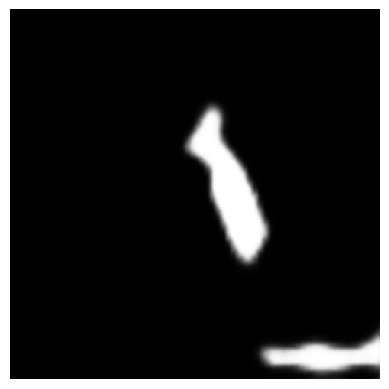

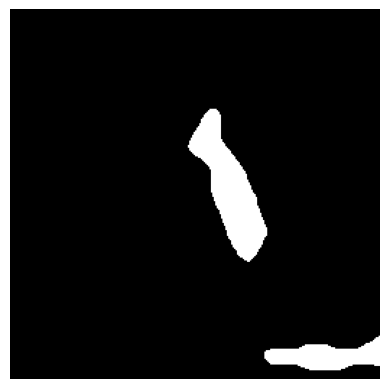

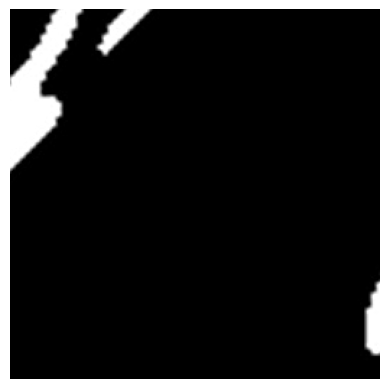

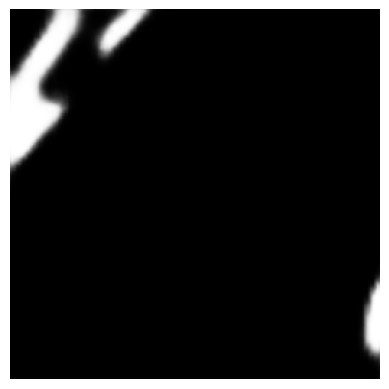

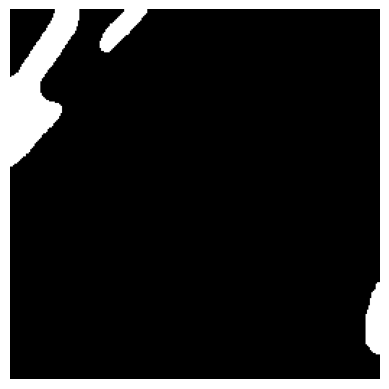

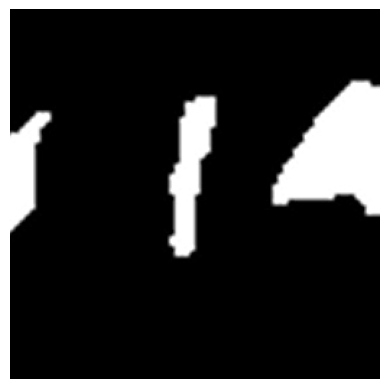

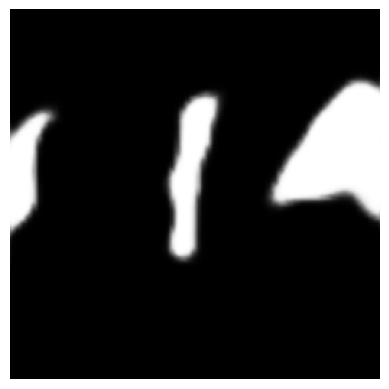

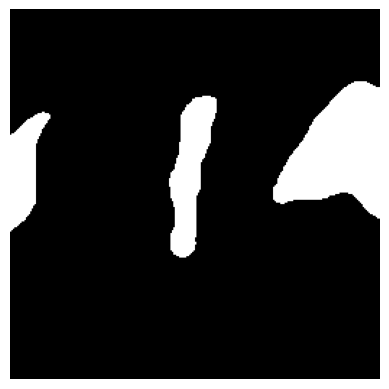

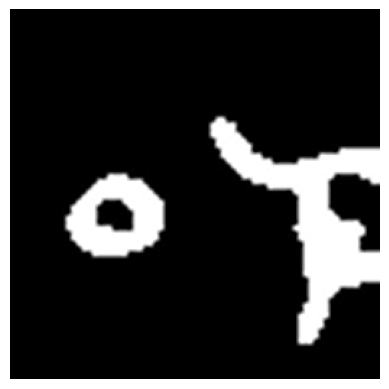

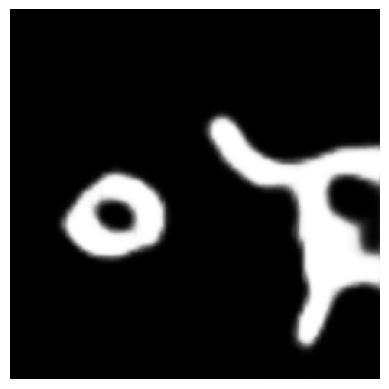

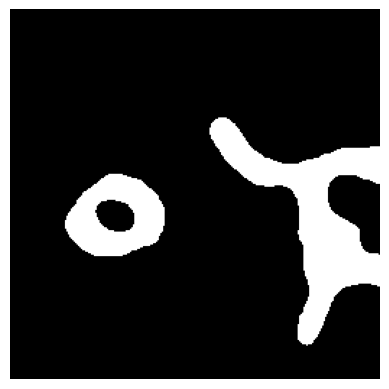

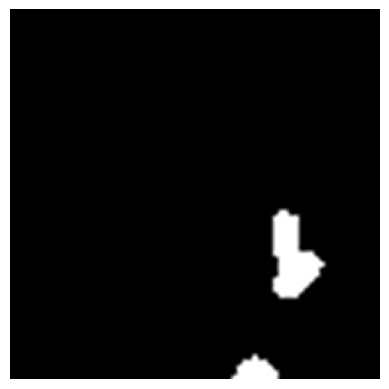

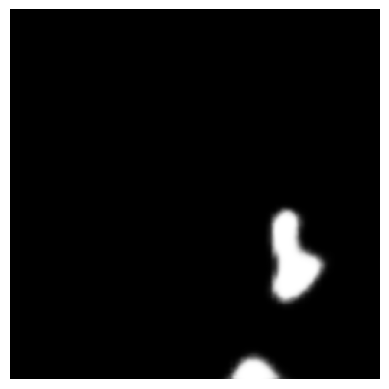

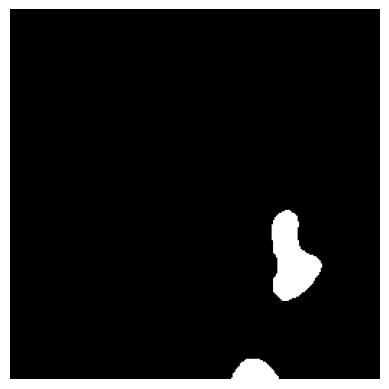

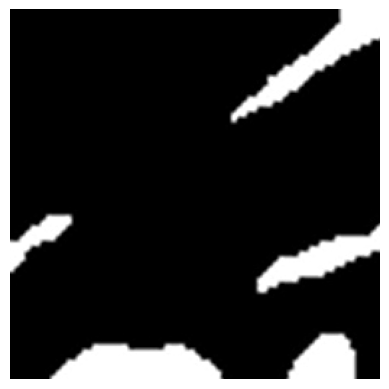

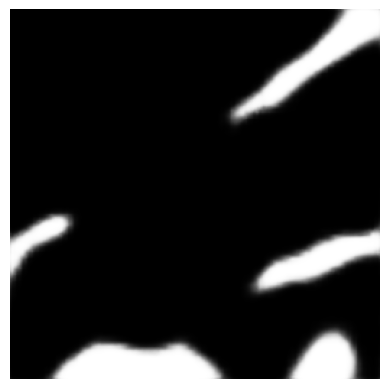

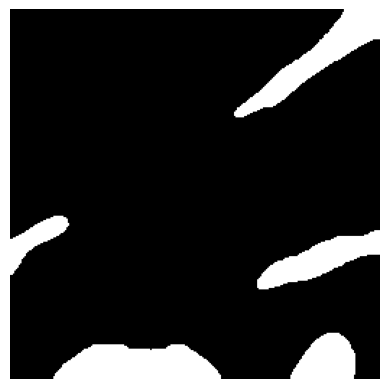

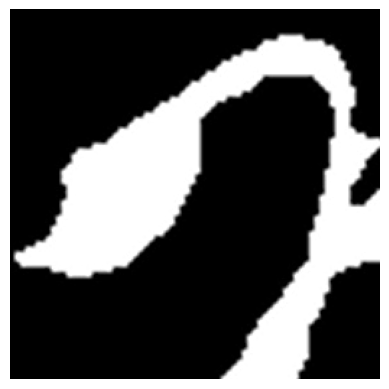

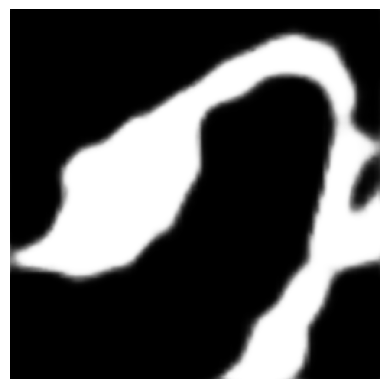

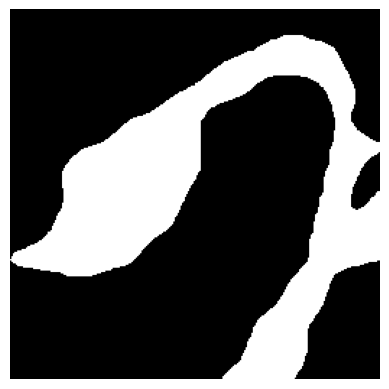

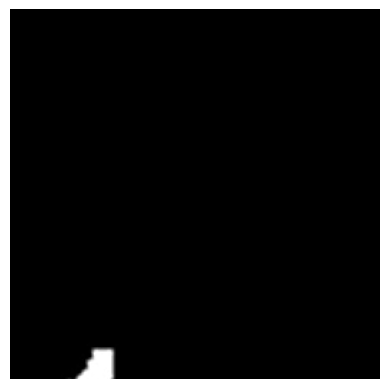

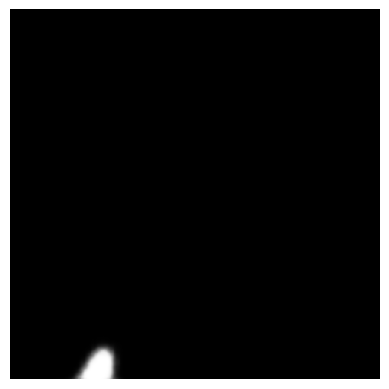

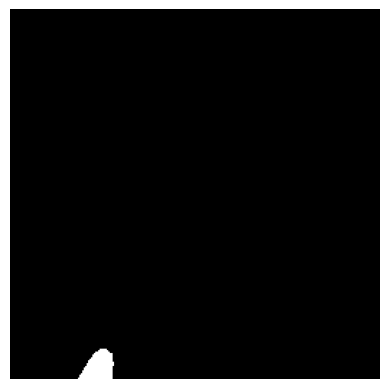

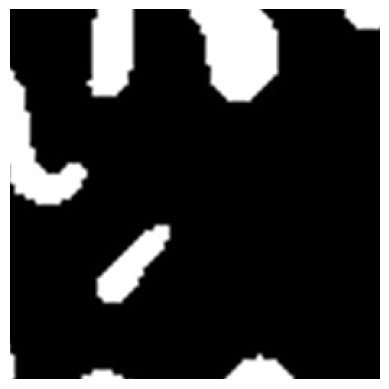

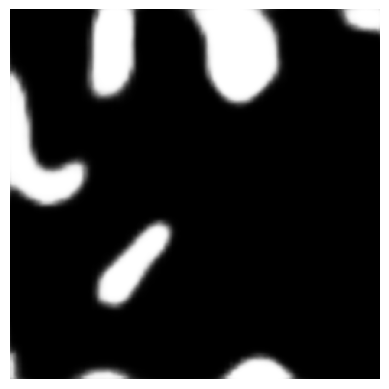

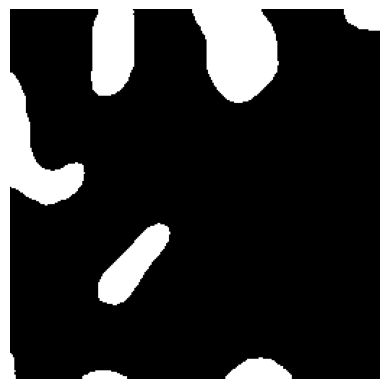

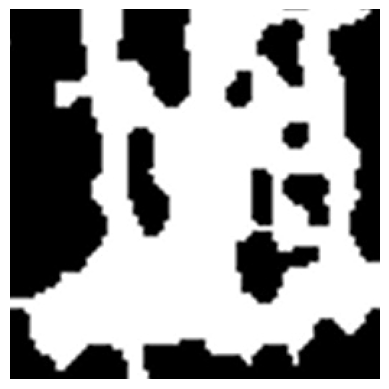

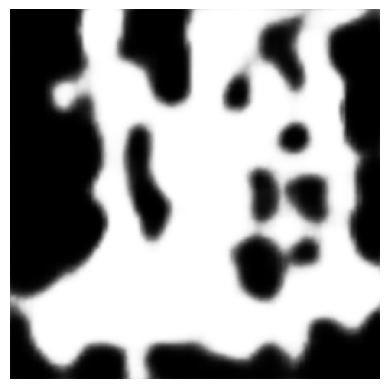

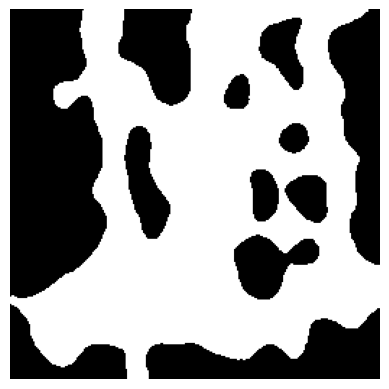

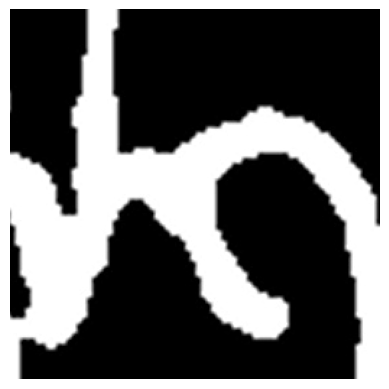

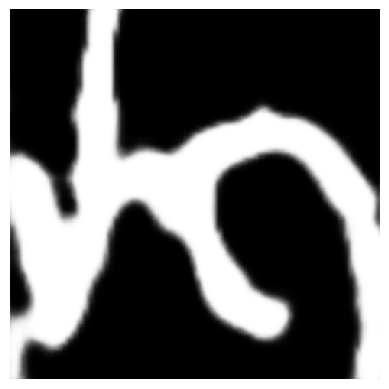

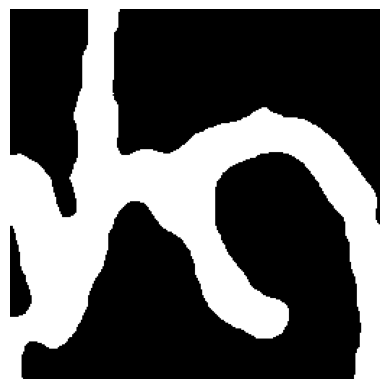

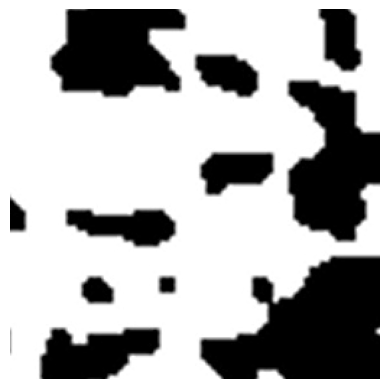

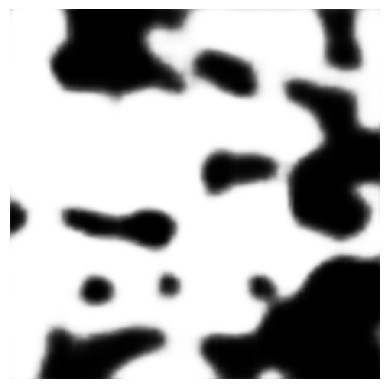

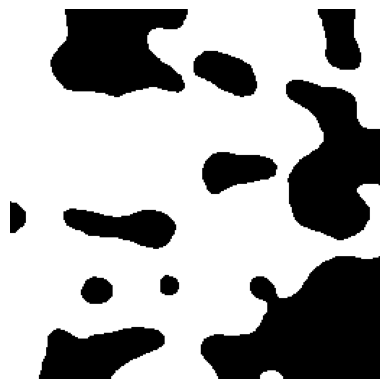

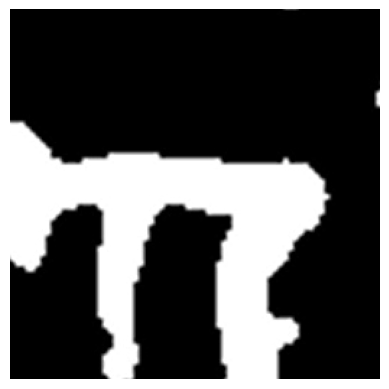

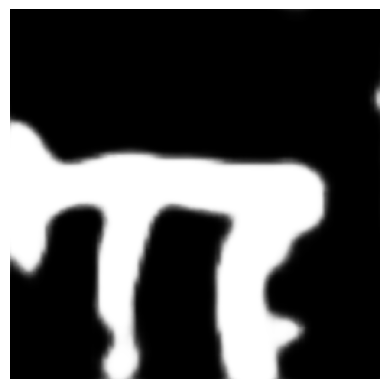

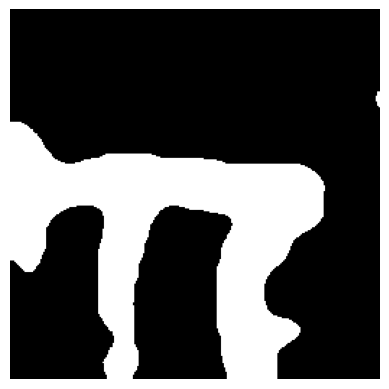

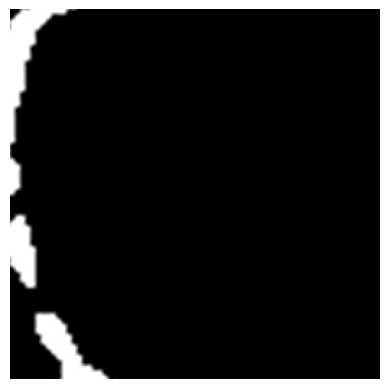

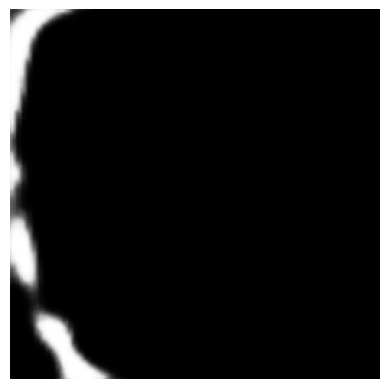

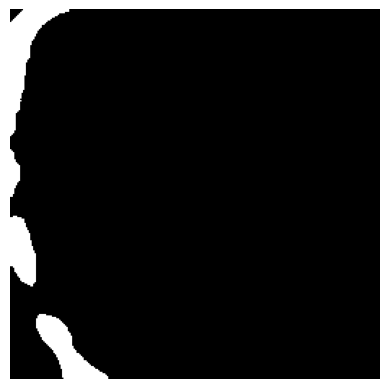

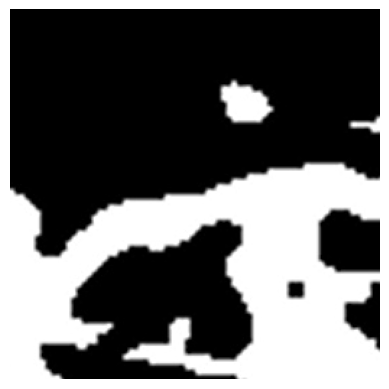

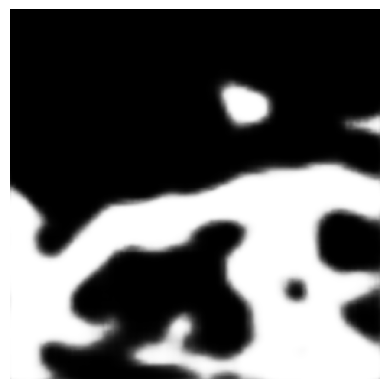

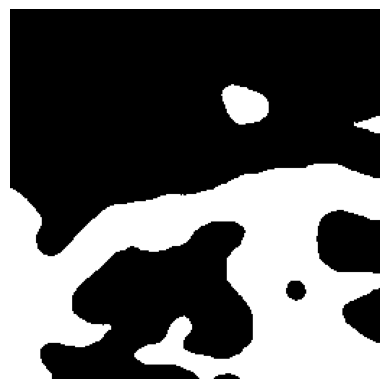

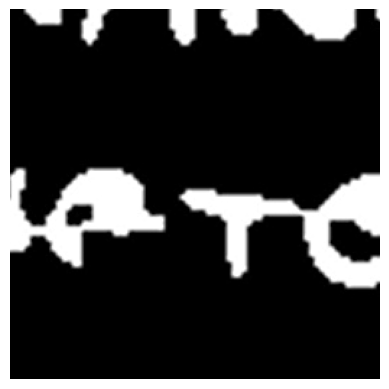

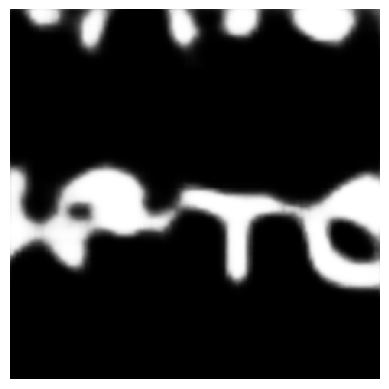

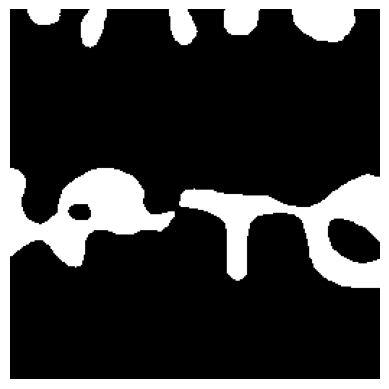

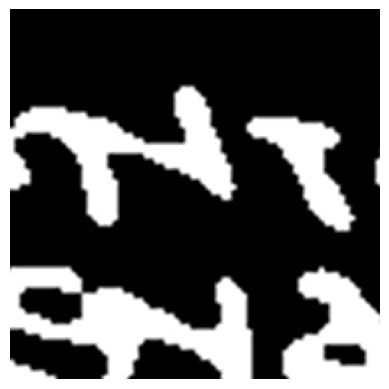

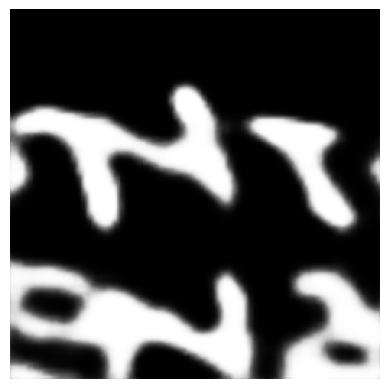

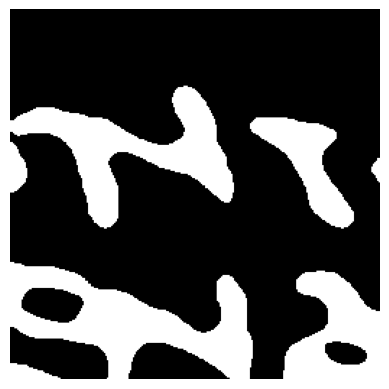

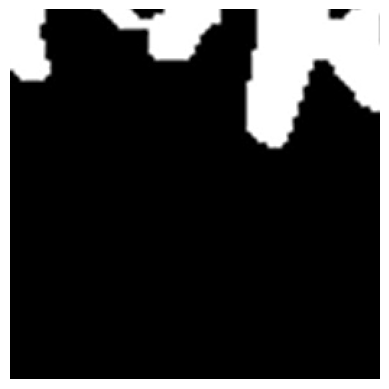

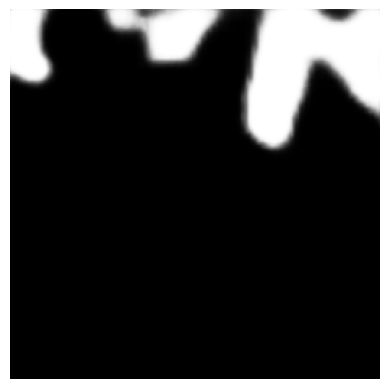

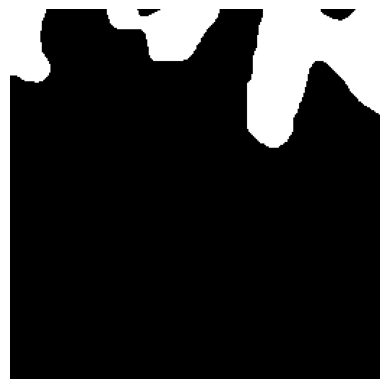

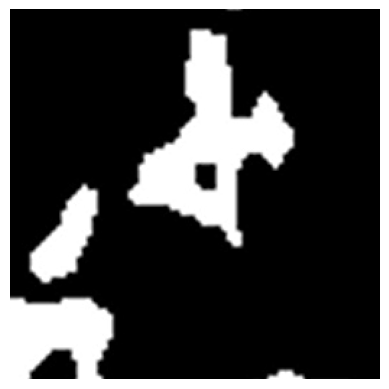

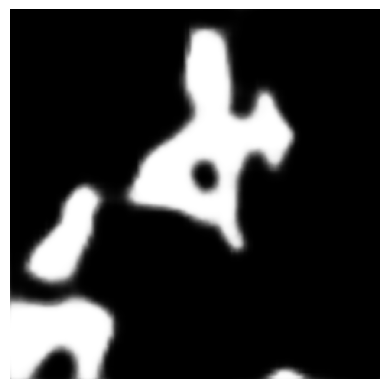

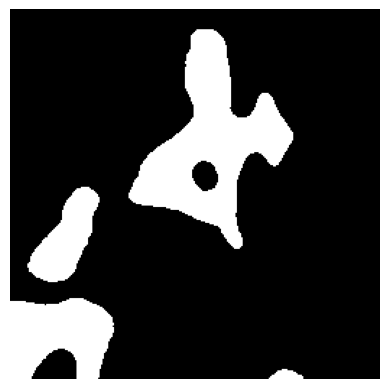

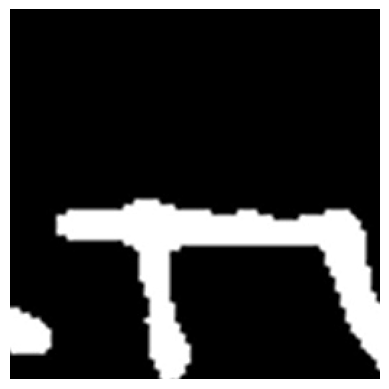

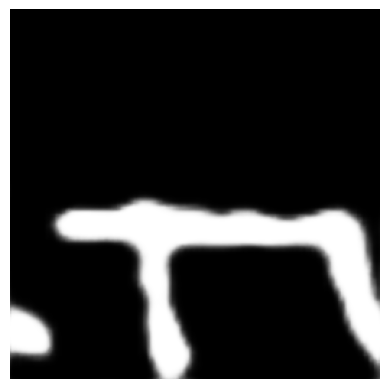

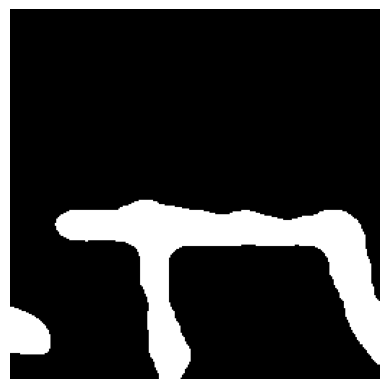

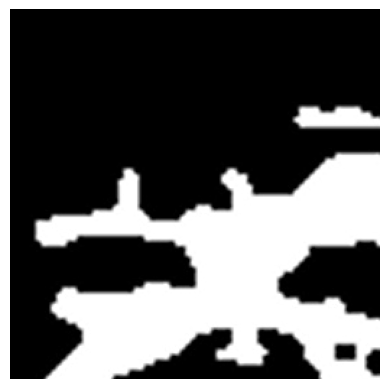

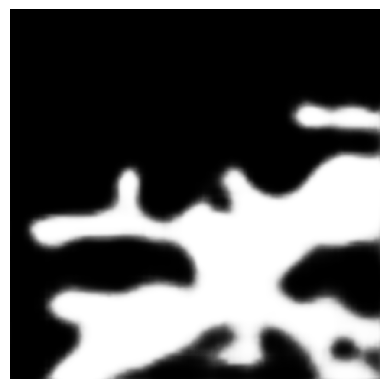

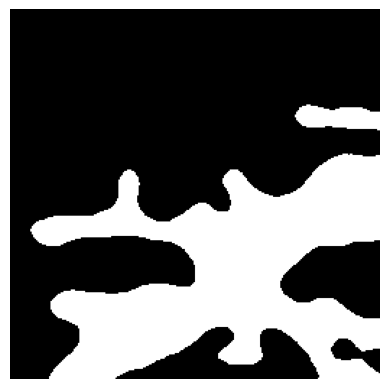

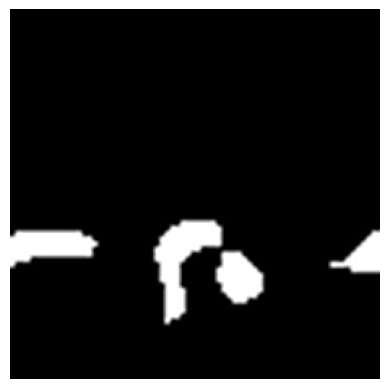

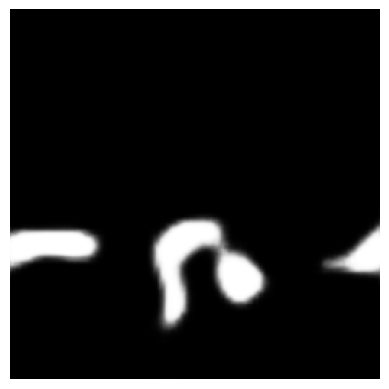

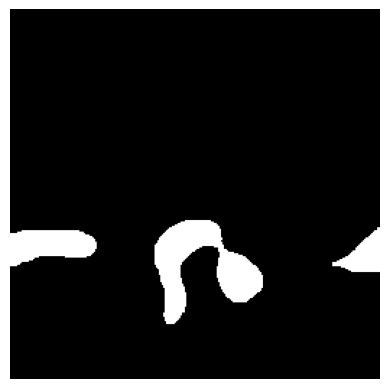

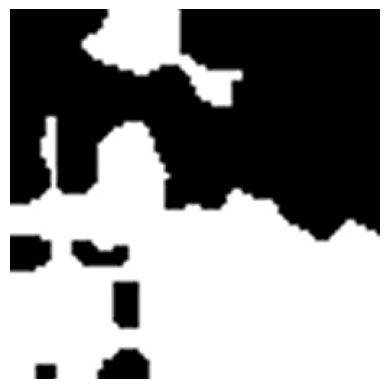

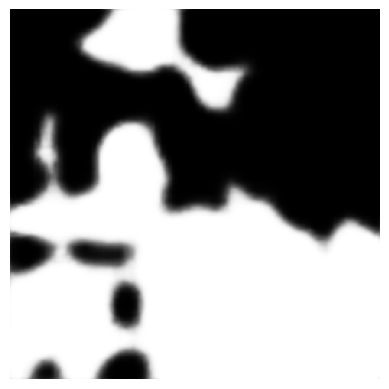

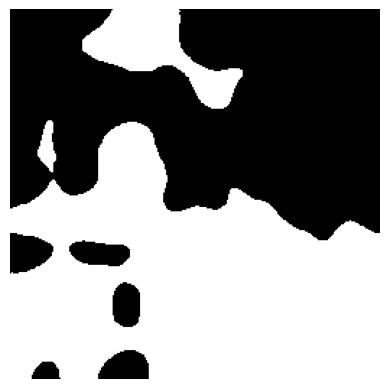

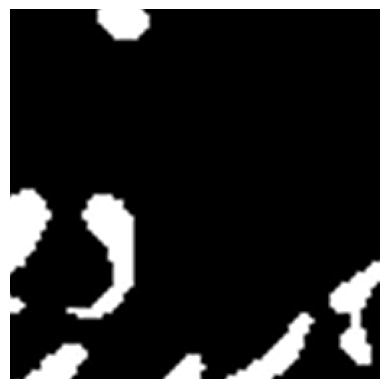

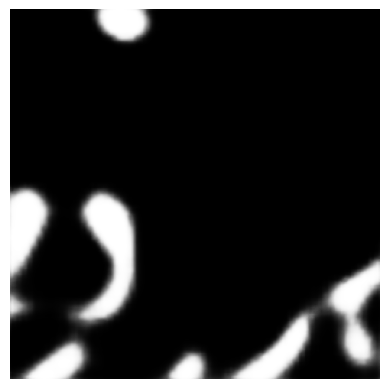

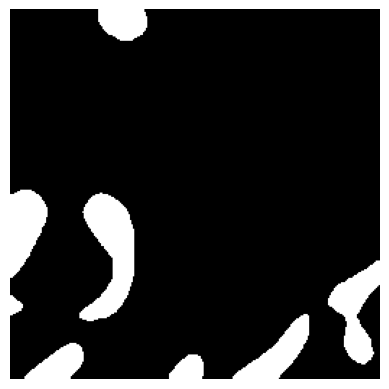

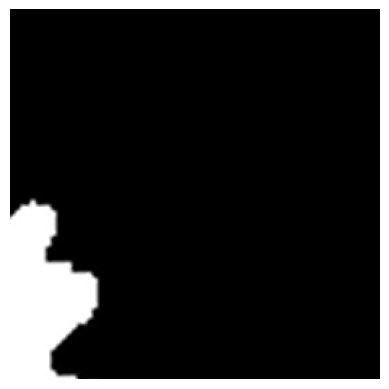

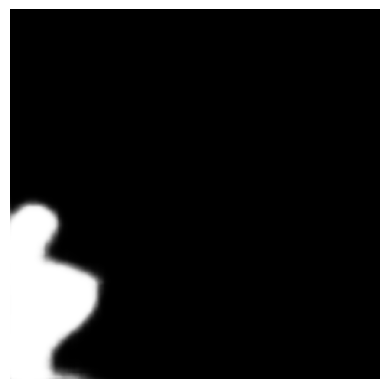

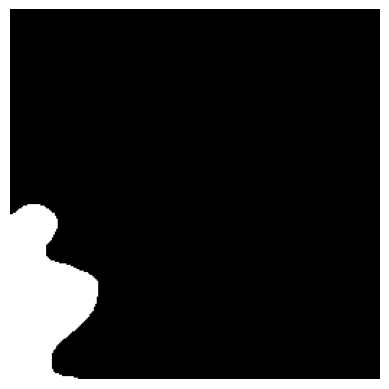

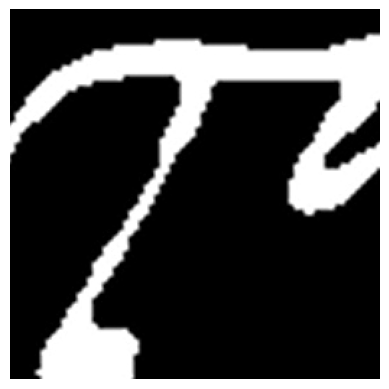

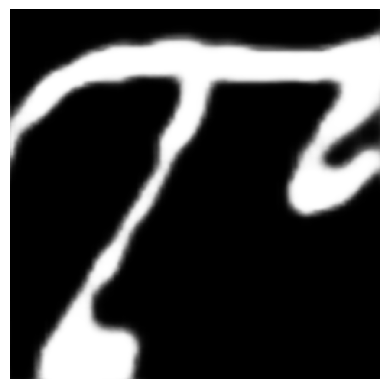

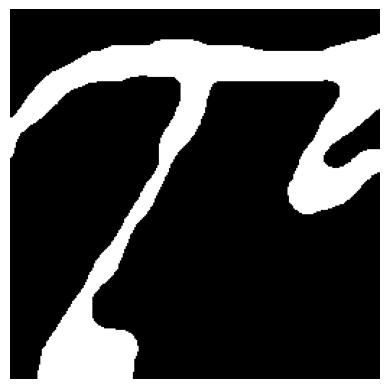

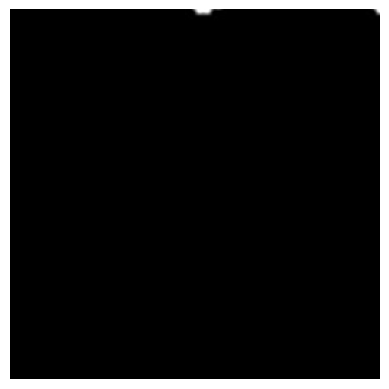

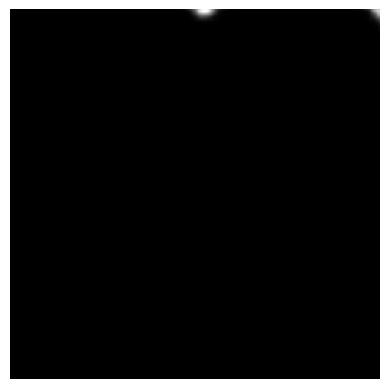

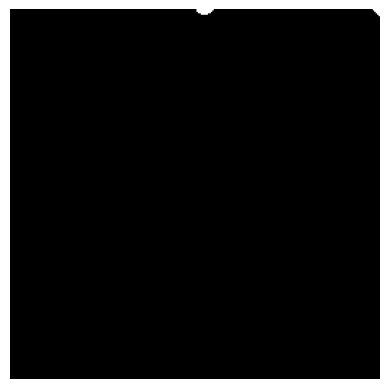

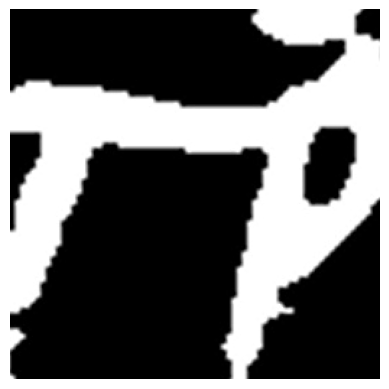

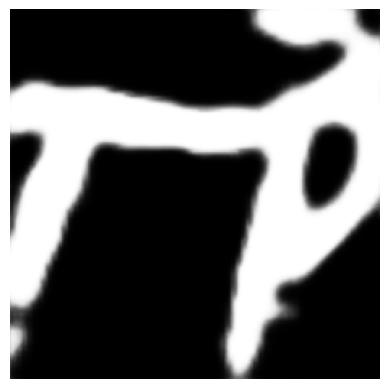

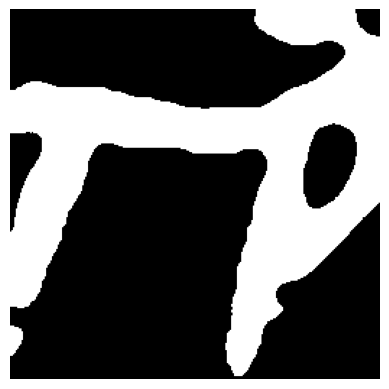

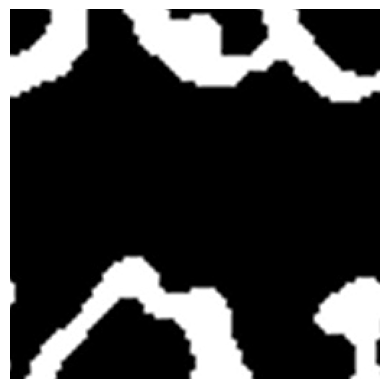

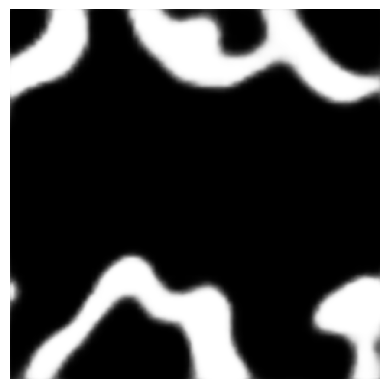

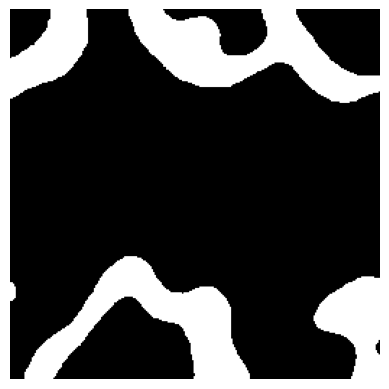

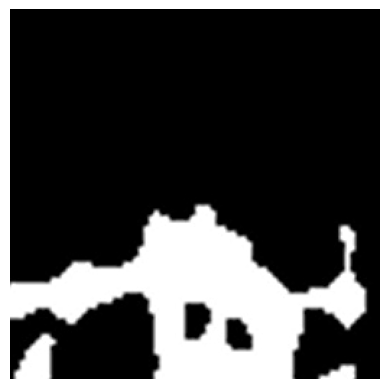

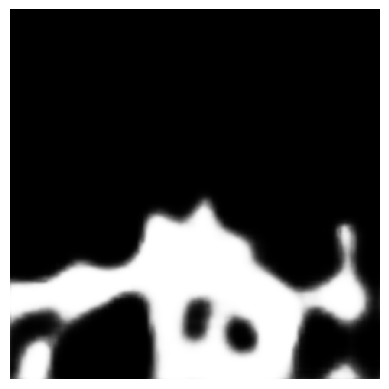

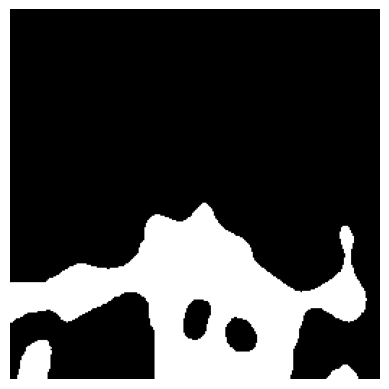

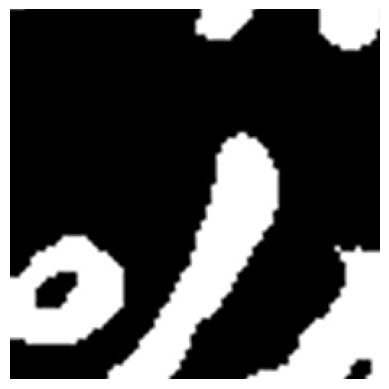

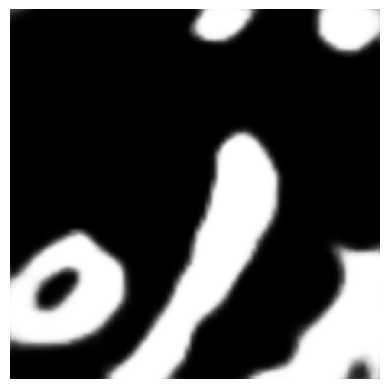

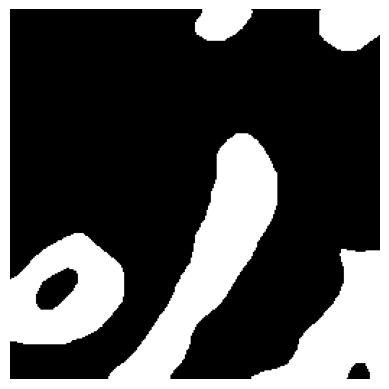

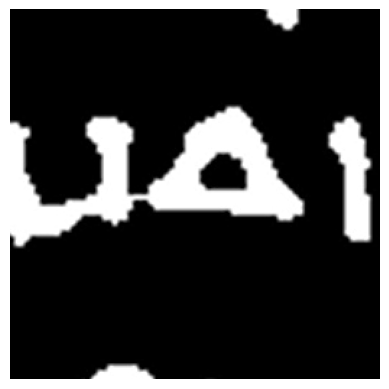

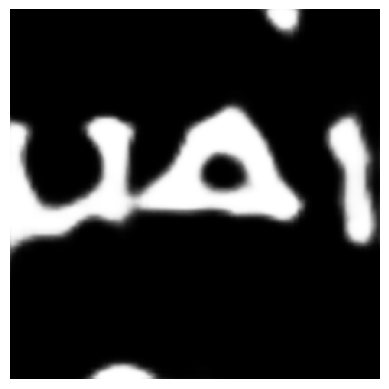

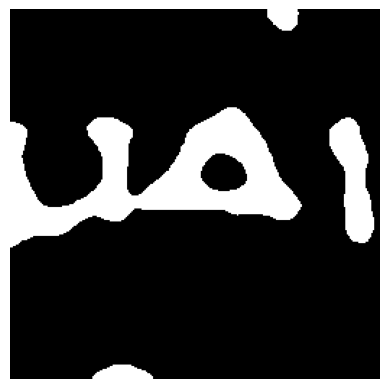

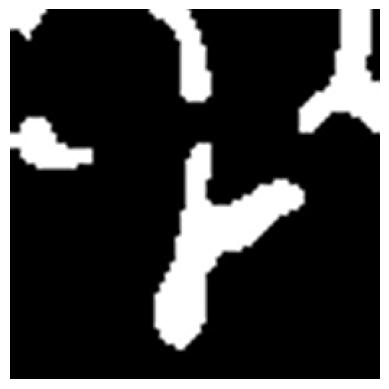

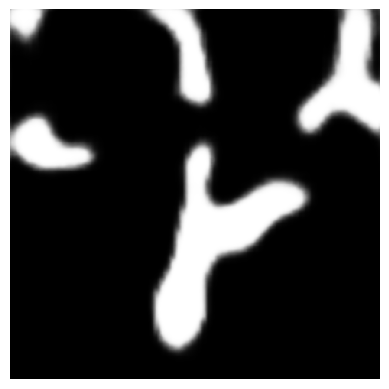

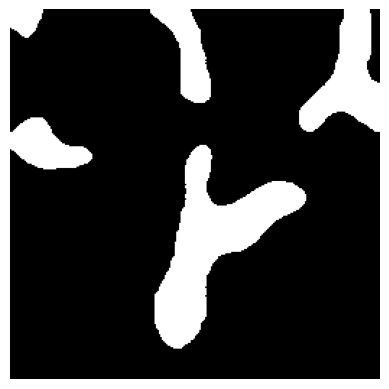

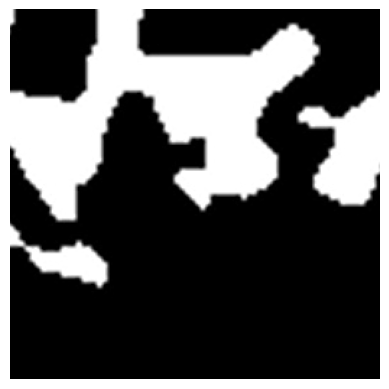

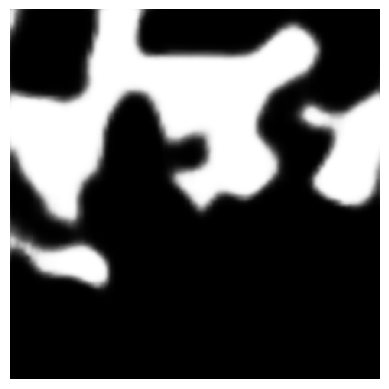

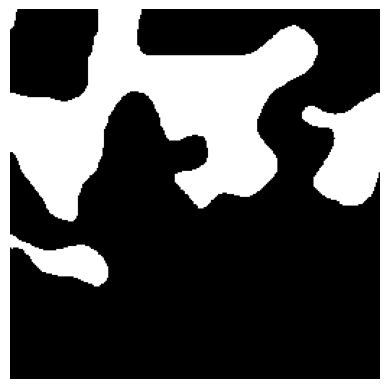

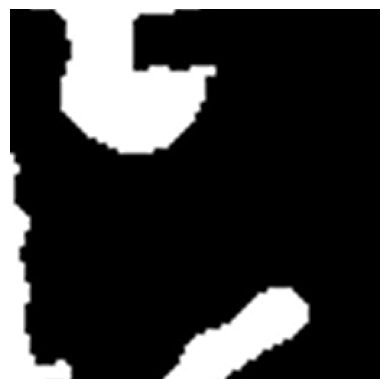

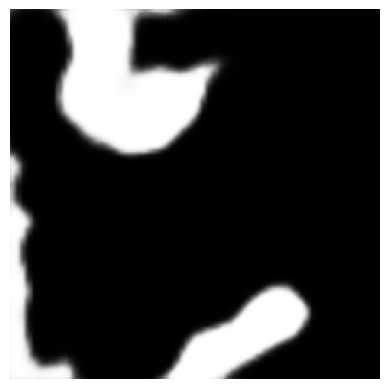

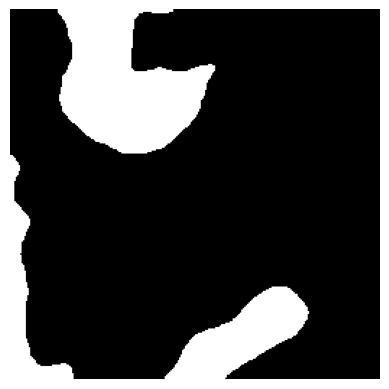

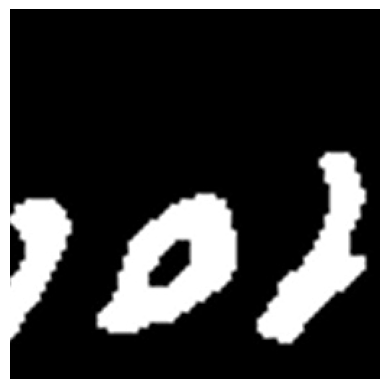

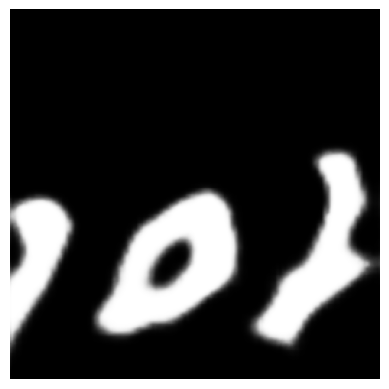

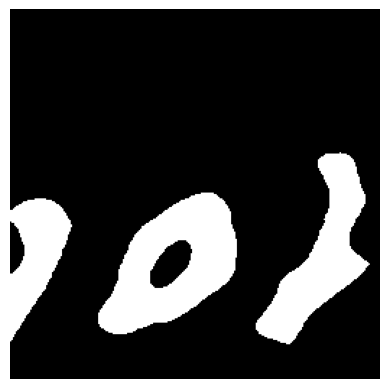

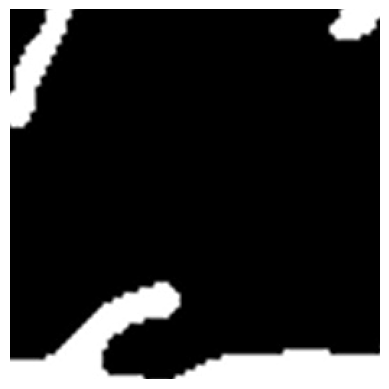

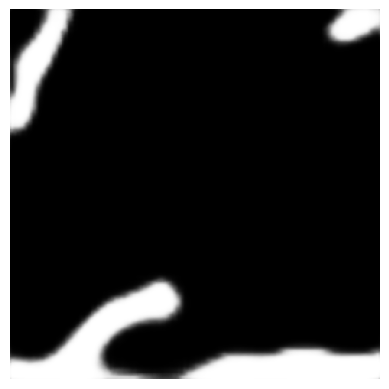

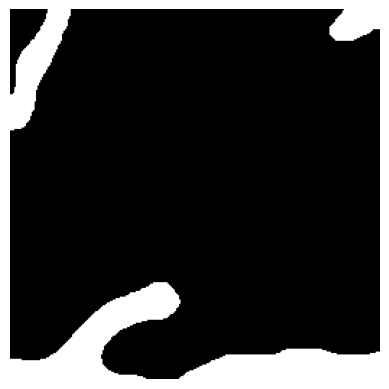

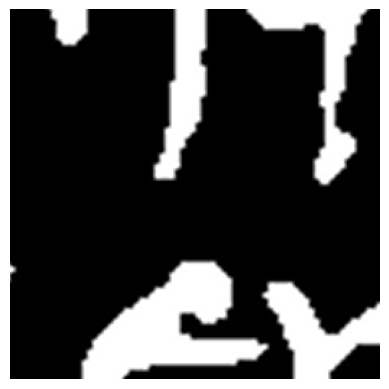

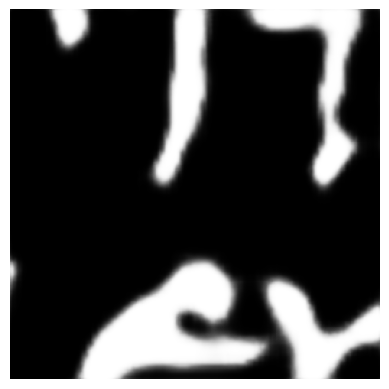

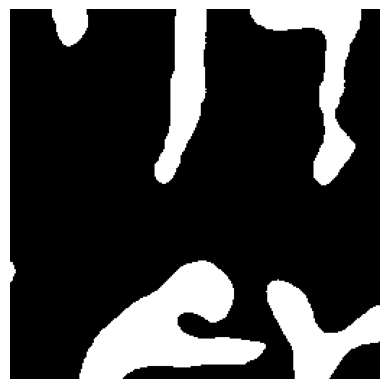

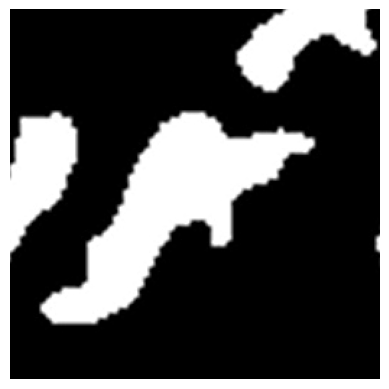

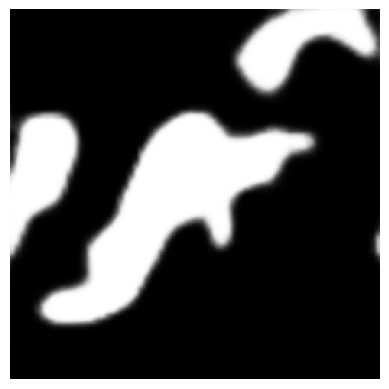

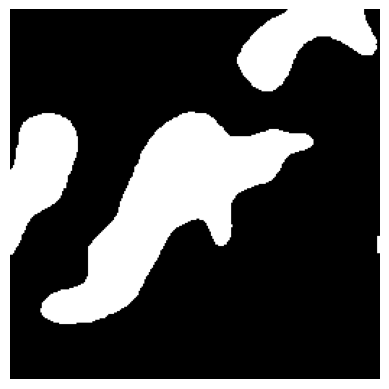

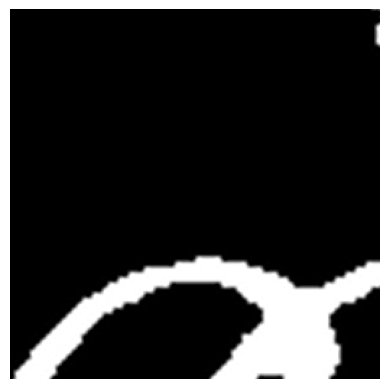

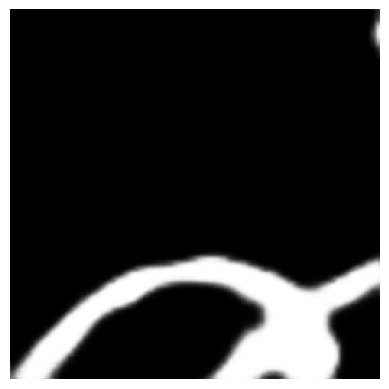

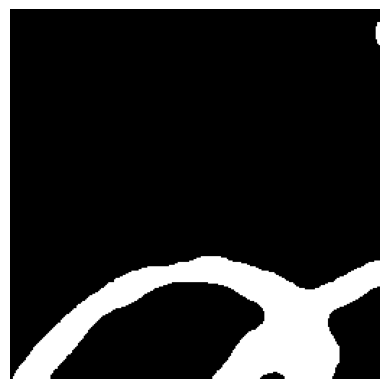

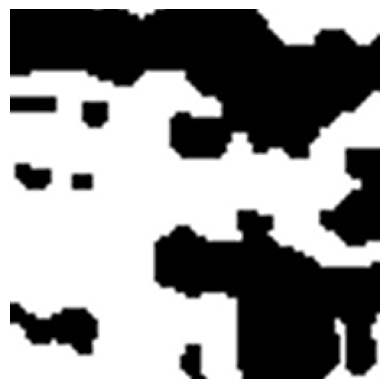

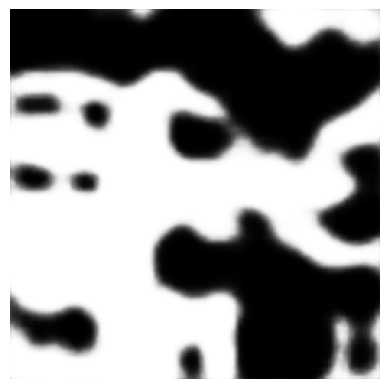

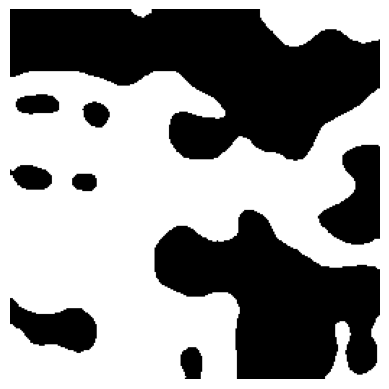

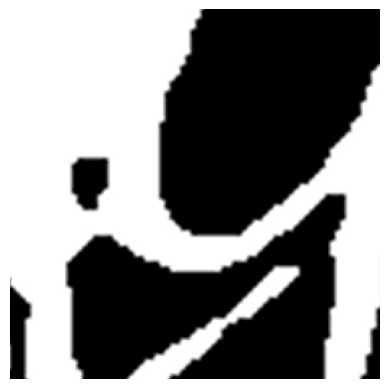

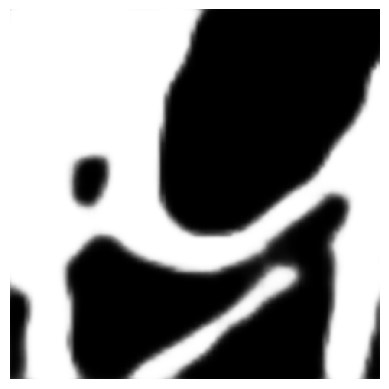

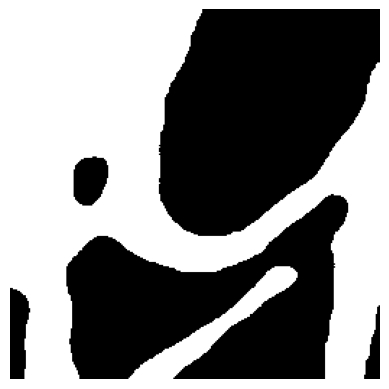

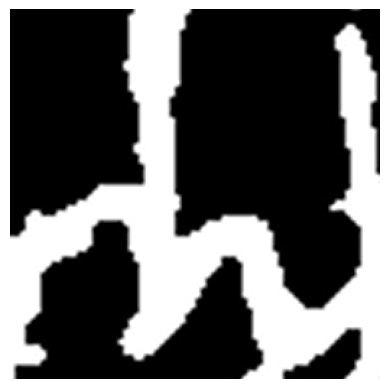

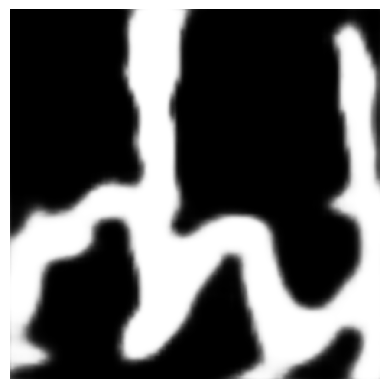

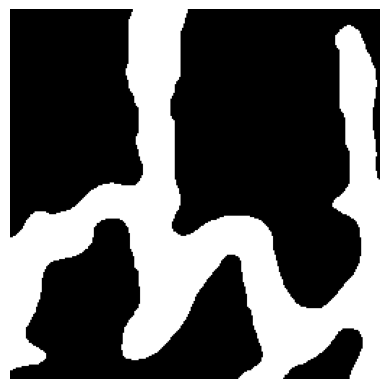

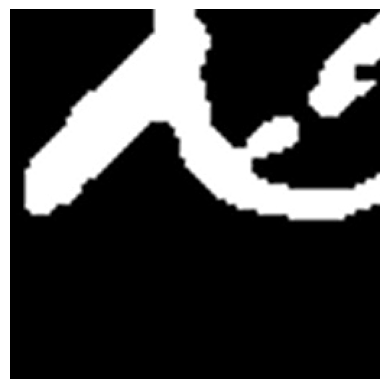

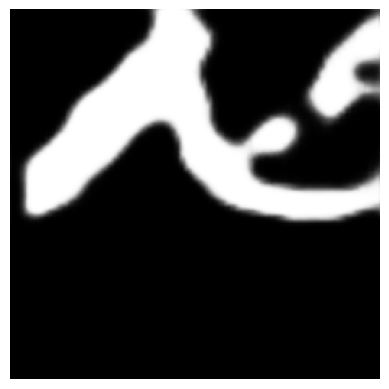

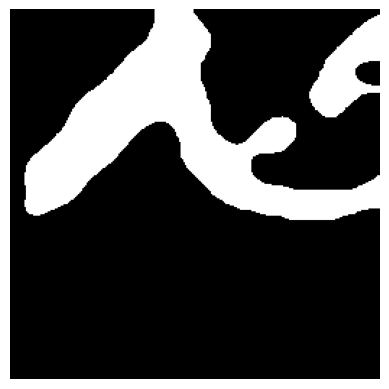

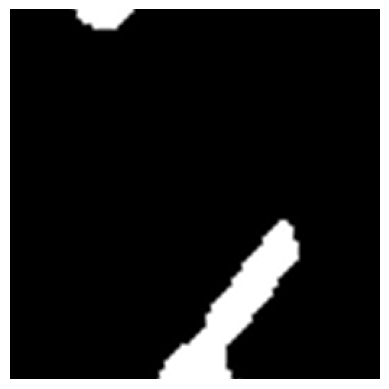

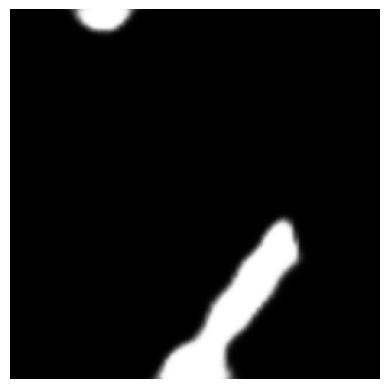

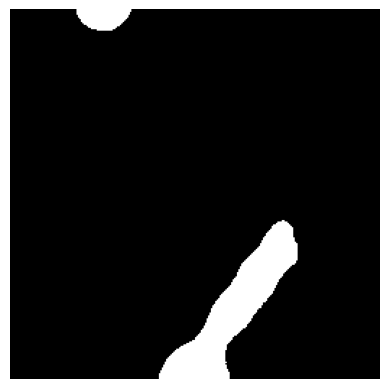

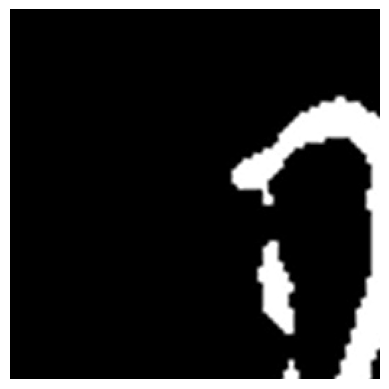

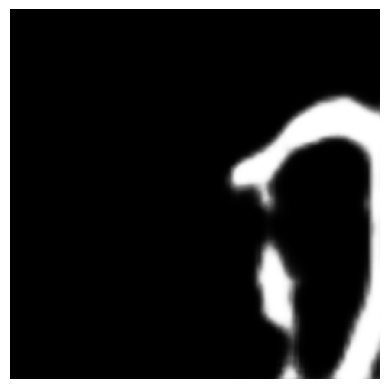

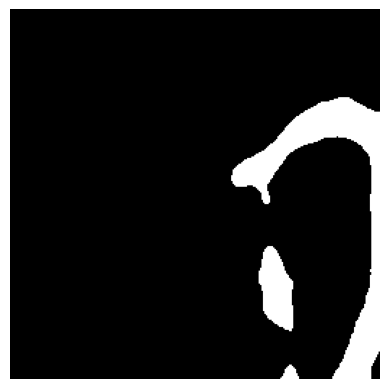

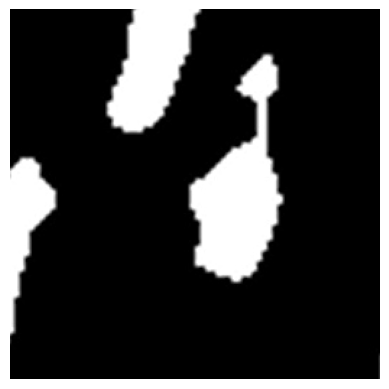

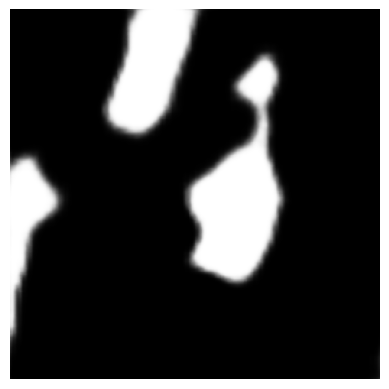

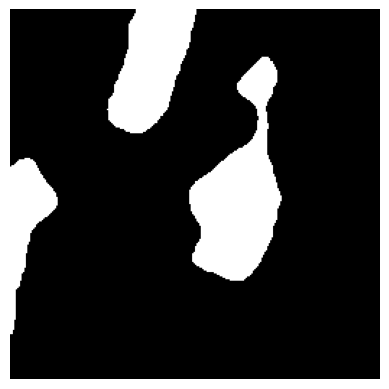

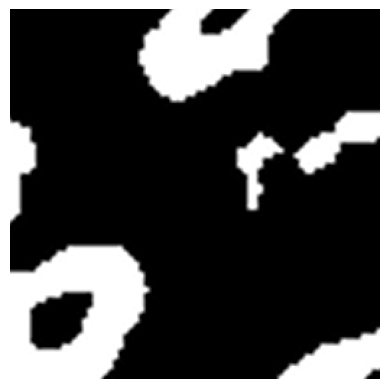

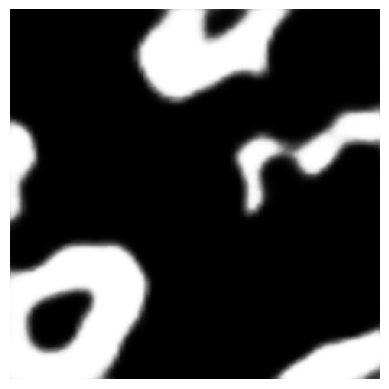

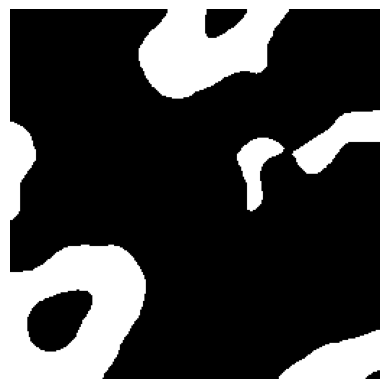

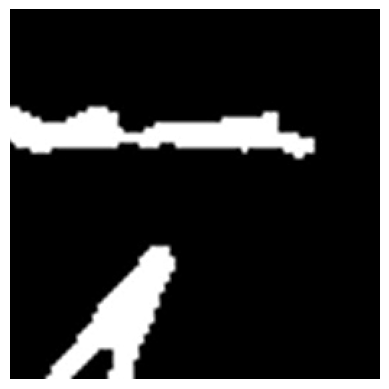

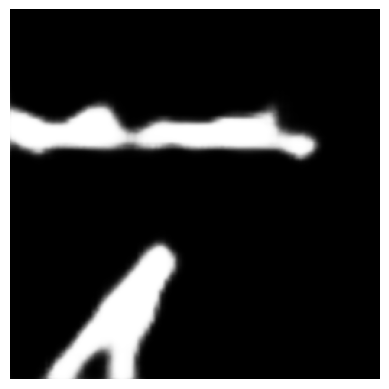

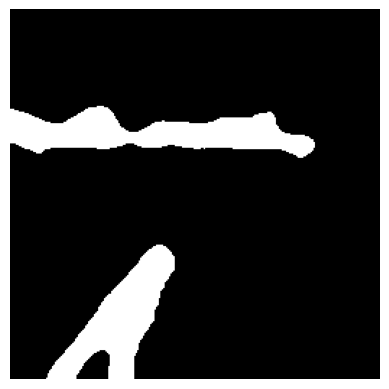

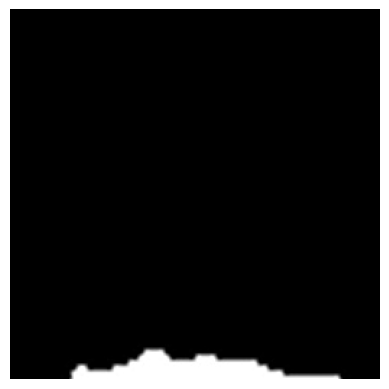

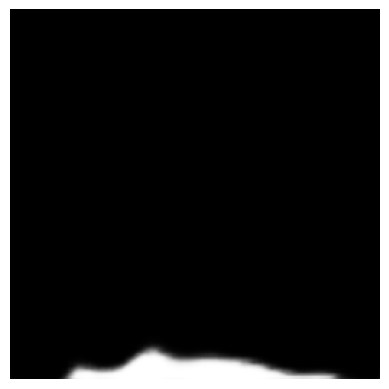

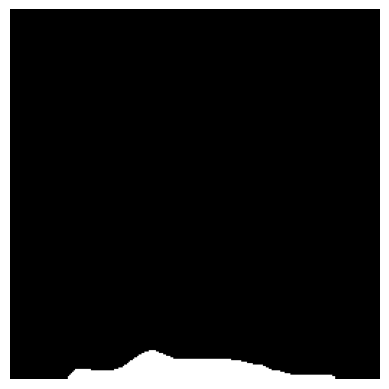

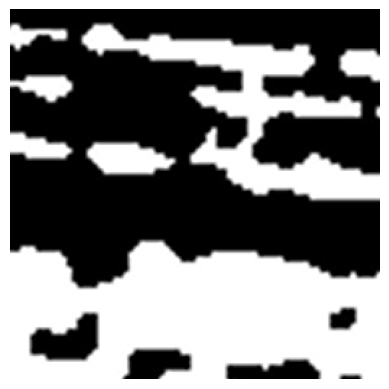

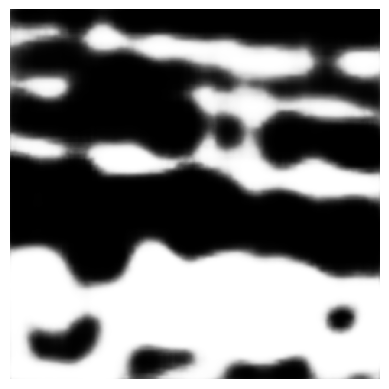

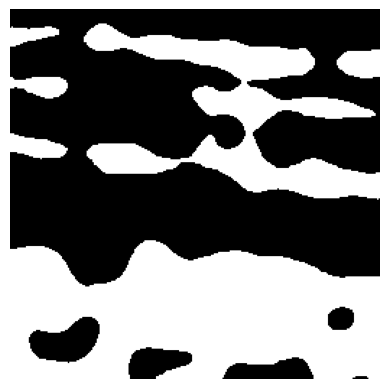

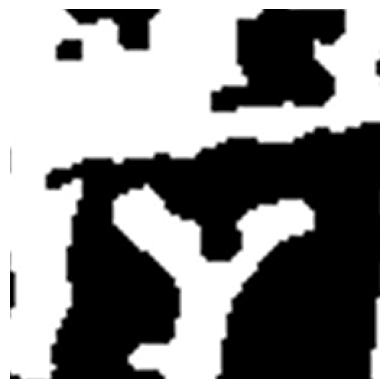

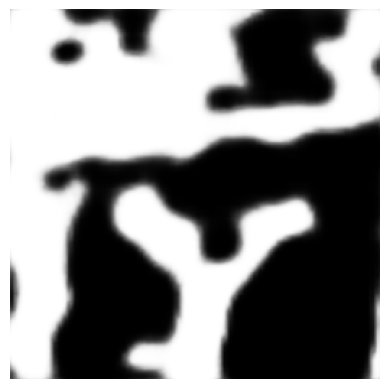

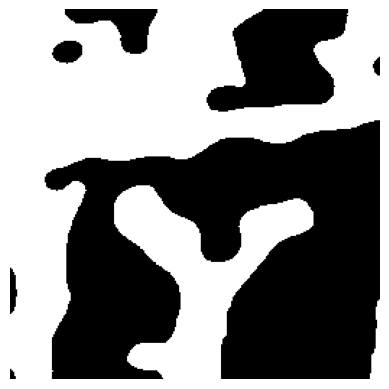

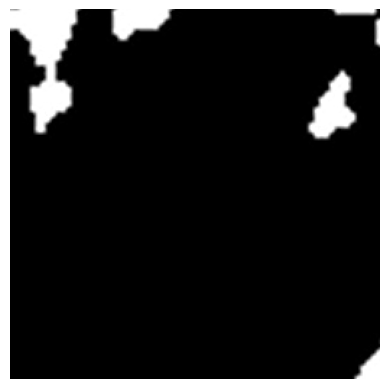

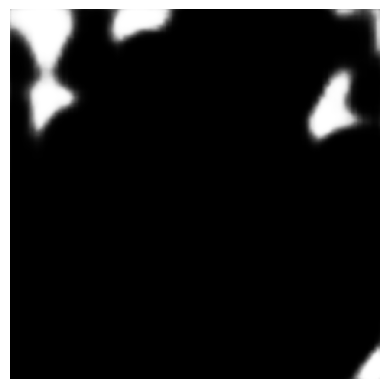

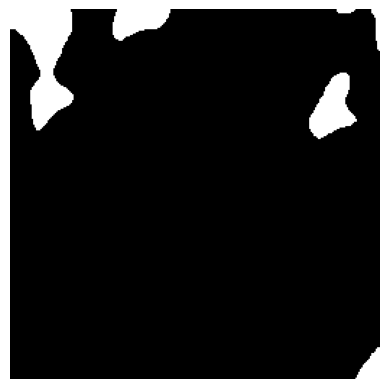

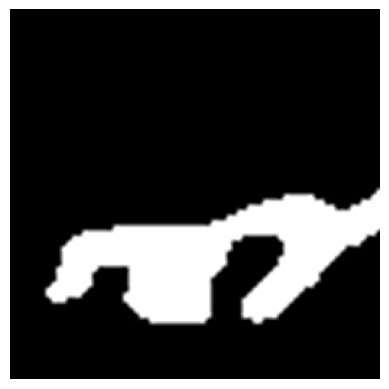

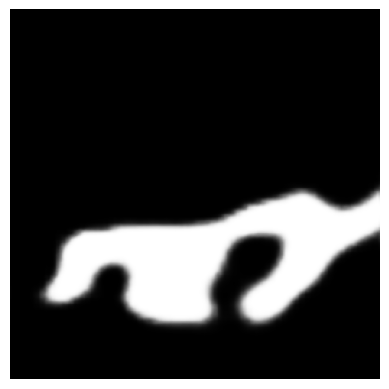

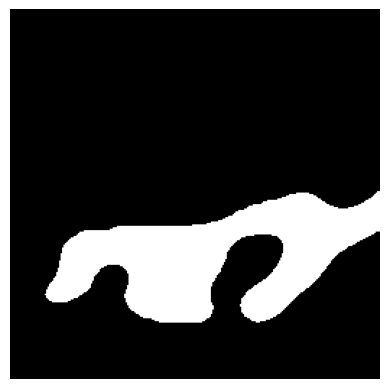

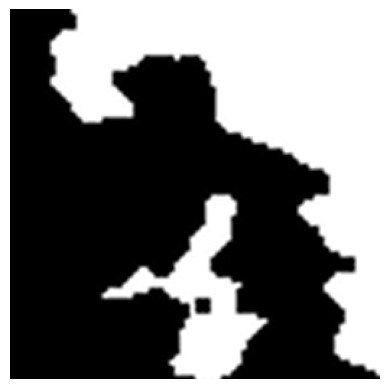

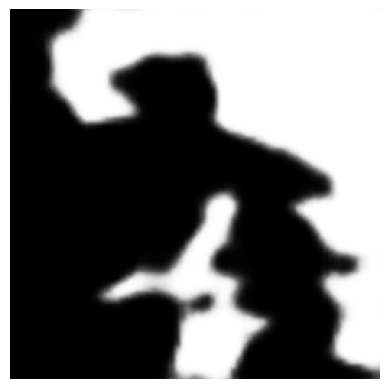

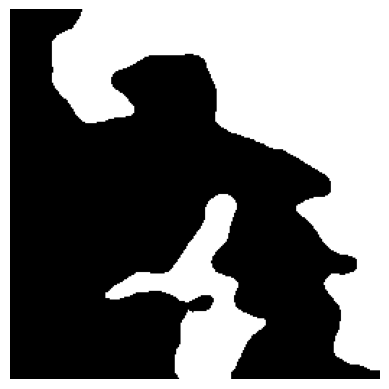

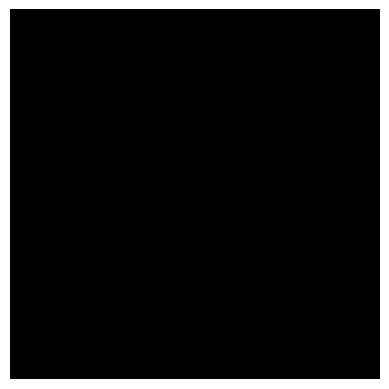

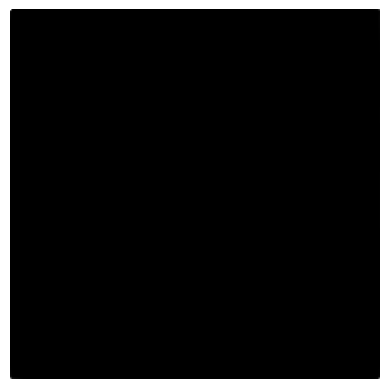

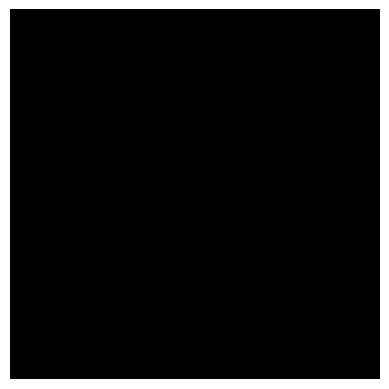

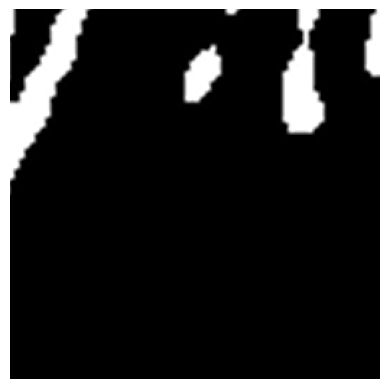

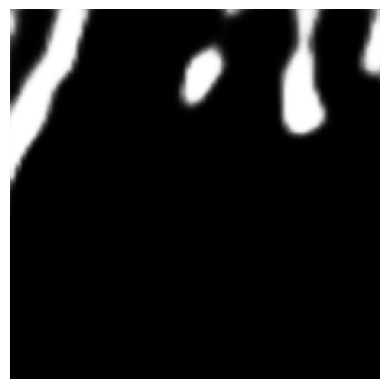

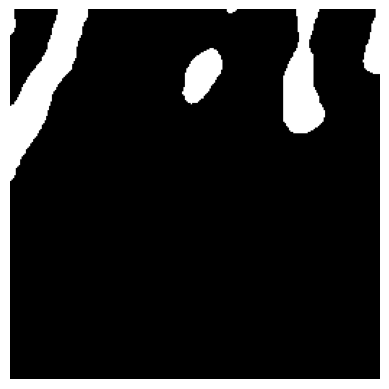

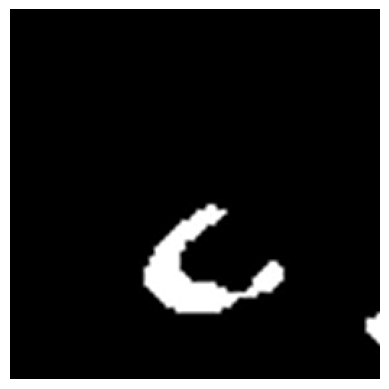

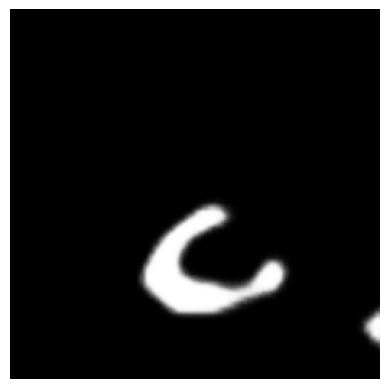

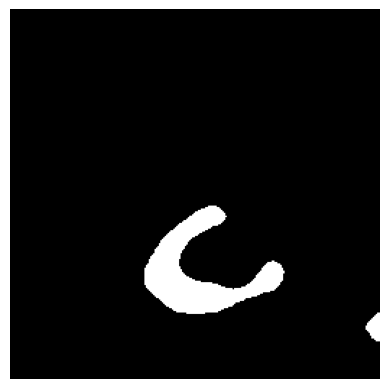

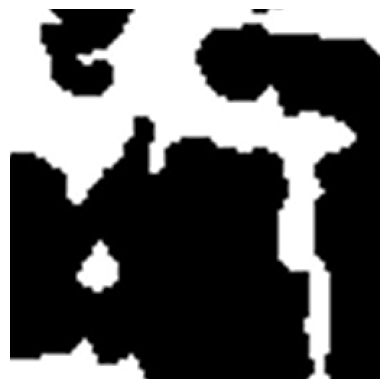

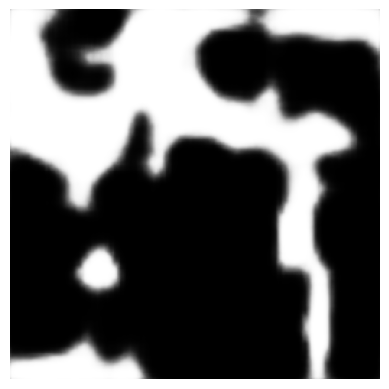

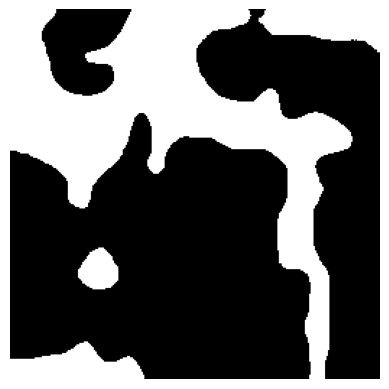

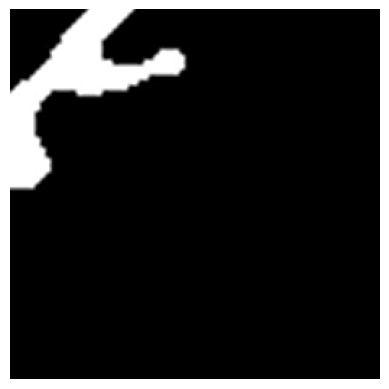

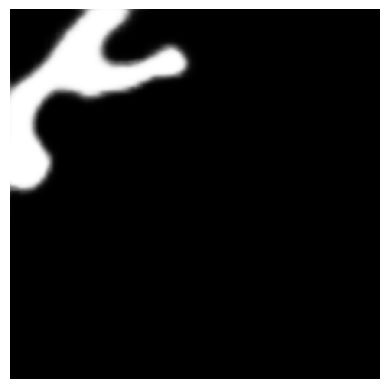

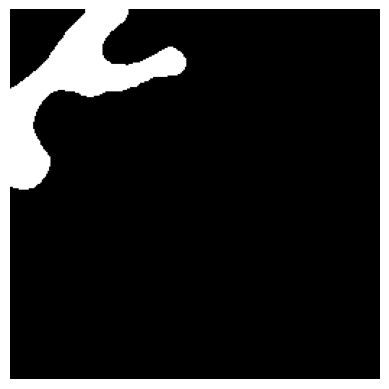

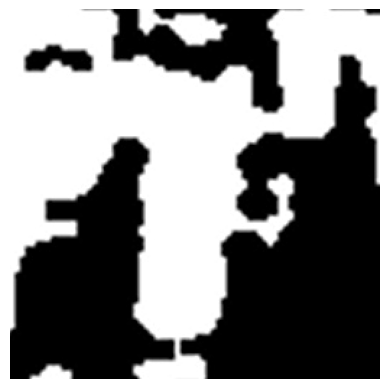

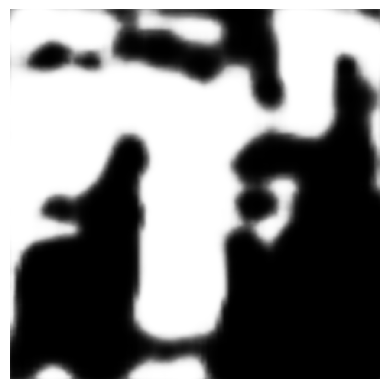

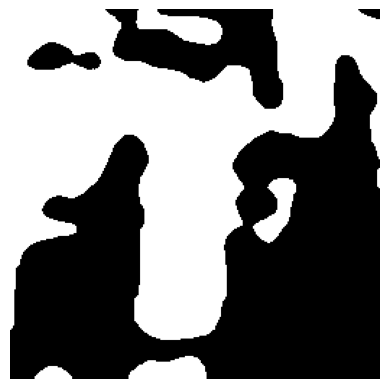

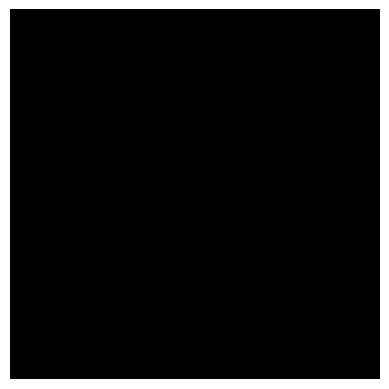

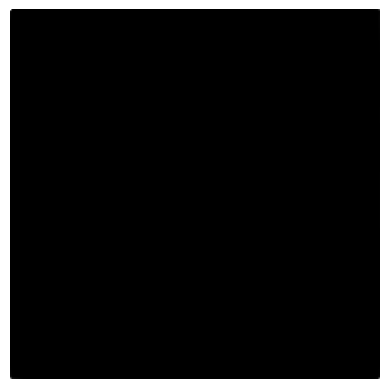

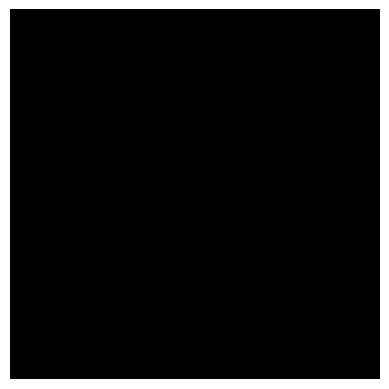

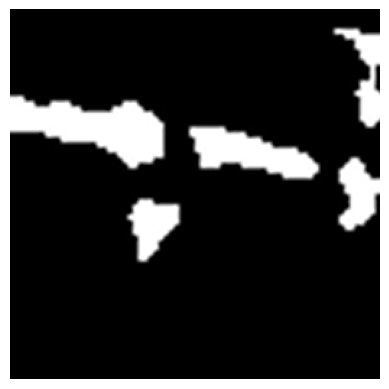

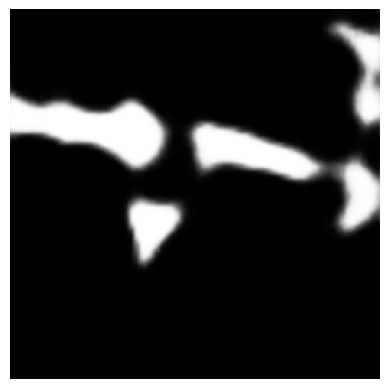

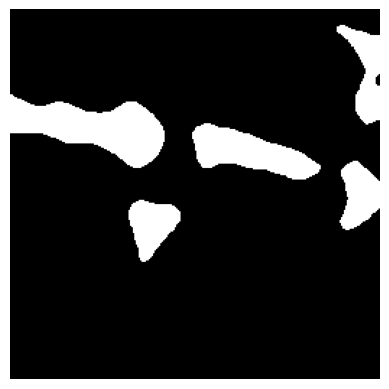

In [45]:
for idx in range(100):
    plt.imshow(lbls[idx][0][0], cmap='gray')  # Assuming grayscale images
    plt.axis('off')
    plt.show()

    plt.imshow(res[idx][0][0], cmap='gray')  # Assuming grayscale images
    plt.axis('off')
    plt.show()

    plt.imshow(res[idx][0][0] > 0.5, cmap='gray')  # Assuming grayscale images
    plt.axis('off')
    plt.show()

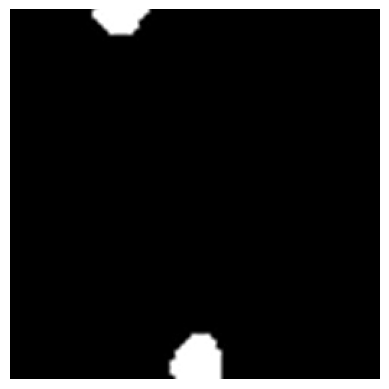

In [36]:
dice_scores, average_dice = calculate_dice_coefficient(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(dice_scores):
    print(f"Dice for pair {i + 1}: {iou:.4f}")

print(f"Average Dice: {average_dice:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Dice for pair 1: 0.9980
Dice for pair 2: 0.9992
Dice for pair 3: 1.0020
Dice for pair 4: 1.0107
Dice for pair 5: 1.0006
Dice for pair 6: 0.9895
Dice for pair 7: 0.9982
Dice for pair 8: 1.0022
Dice for pair 9: 0.9376
Dice for pair 10: 0.9938
Dice for pair 11: 0.9886
Dice for pair 12: 1.0036
Dice for pair 13: 0.9942
Dice for pair 14: 0.9983
Dice for pair 15: 1.0050
Dice for pair 16: 0.9957
Dice for pair 17: 0.9864
Dice for pair 18: 1.0048
Dice for pair 19: 0.9950
Dice for pair 20: 0.9991
Dice for pair 21: 0.9900
Dice for pair 22: 1.0025
Dice for pair 23: 0.9948
Dice for pair 24: 1.0018
Dice for pair 25: 0.9963
Dice for pair 26: 1.0015
Dice for pair 27: 1.0012
Dice for pair 28: 0.9987
Dice for pair 29: 1.0001
Dice for pair 30: 0.0000
Dice for pair 31: 0.9920
Dice for pair 32: 0.9973
Dice for pair 33: 1.0131
Dice for pair 34: 0.0000
Dice for pair 35: 1.0004
Dice for pair 36: 0.9917
Dice for pair 37: 0.9997
Dice for pair 38: 0.9955
Dice for pair 39: 0.9991
Dice for pair 40: 0.9993
Dice for 

In [38]:
acc_scores, average_acc = calculate_accuracy(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(acc_scores):
    print(f"Acc for pair {i + 1}: {iou:.4f}")

print(f"Average Acc: {average_acc:.4f}")

Acc for pair 1: 0.9162
Acc for pair 2: 0.9278
Acc for pair 3: 0.8545
Acc for pair 4: 0.9218
Acc for pair 5: 0.9245
Acc for pair 6: 0.8664
Acc for pair 7: 0.9032
Acc for pair 8: 0.9062
Acc for pair 9: 0.9939
Acc for pair 10: 0.9232
Acc for pair 11: 0.8610
Acc for pair 12: 0.8380
Acc for pair 13: 0.9826
Acc for pair 14: 0.8972
Acc for pair 15: 0.9793
Acc for pair 16: 0.9223
Acc for pair 17: 0.8583
Acc for pair 18: 0.9507
Acc for pair 19: 0.8414
Acc for pair 20: 0.8526
Acc for pair 21: 0.9062
Acc for pair 22: 0.8282
Acc for pair 23: 0.9084
Acc for pair 24: 0.9101
Acc for pair 25: 0.8481
Acc for pair 26: 0.9158
Acc for pair 27: 0.9042
Acc for pair 28: 0.9815
Acc for pair 29: 0.9064
Acc for pair 30: 1.0000
Acc for pair 31: 0.9720
Acc for pair 32: 0.9670
Acc for pair 33: 0.9189
Acc for pair 34: 1.0000
Acc for pair 35: 0.9627
Acc for pair 36: 0.8622
Acc for pair 37: 0.8257
Acc for pair 38: 0.8942
Acc for pair 39: 0.9883
Acc for pair 40: 0.8712
Acc for pair 41: 0.8989
Acc for pair 42: 0.9509
A

In [42]:
prec_scores, average_prec = calculate_precision(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(prec_scores):
    print(f"Prec for pair {i + 1}: {iou:.4f}")

print(f"Average Prec: {average_prec:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Prec for pair 1: 0.9977
Prec for pair 2: 0.9990
Prec for pair 3: 0.9966
Prec for pair 4: 0.9981
Prec for pair 5: 0.9988
Prec for pair 6: 0.9967
Prec for pair 7: 0.9995
Prec for pair 8: 0.9970
Prec for pair 9: 0.9600
Prec for pair 10: 0.9899
Prec for pair 11: 0.9965
Prec for pair 12: 0.9915
Prec for pair 13: 1.0000
Prec for pair 14: 0.9991
Prec for pair 15: 0.9980
Prec for pair 16: 0.9999
Prec for pair 17: 0.9886
Prec for pair 18: 0.9980
Prec for pair 19: 0.9989
Prec for pair 20: 0.9977
Prec for pair 21: 0.9983
Prec for pair 22: 0.9949
Prec for pair 23: 0.9991
Prec for pair 24: 0.9989
Prec for pair 25: 0.9961
Prec for pair 26: 0.9986
Prec for pair 27: 0.9974
Prec for pair 28: 0.9985
Prec for pair 29: 0.9989
Prec for pair 30: 0.0000
Prec for pair 31: 0.9995
Prec for pair 32: 0.9994
Prec for pair 33: 0.9967
Prec for pair 34: 0.0000
Prec for pair 35: 0.9996
Prec for pair 36: 0.9979
Prec for pair 37: 0.9929
Prec for pair 38: 0.9995
Prec for pair 39: 0.9744
Prec for pair 40: 0.9997
Prec for 

In [43]:
prec_scores, average_prec = calculate_recall(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(prec_scores):
    print(f"Rec for pair {i + 1}: {iou:.4f}")

print(f"Average Rec: {average_prec:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Rec for pair 1: 0.9971
Rec for pair 2: 0.9993
Rec for pair 3: 0.9985
Rec for pair 4: 1.0000
Rec for pair 5: 0.9991
Rec for pair 6: 0.9913
Rec for pair 7: 0.9994
Rec for pair 8: 0.9985
Rec for pair 9: 1.0000
Rec for pair 10: 0.9916
Rec for pair 11: 0.9923
Rec for pair 12: 0.9965
Rec for pair 13: 1.0000
Rec for pair 14: 0.9992
Rec for pair 15: 1.0000
Rec for pair 16: 0.9984
Rec for pair 17: 0.9882
Rec for pair 18: 0.9984
Rec for pair 19: 0.9969
Rec for pair 20: 0.9990
Rec for pair 21: 0.9958
Rec for pair 22: 0.9961
Rec for pair 23: 0.9955
Rec for pair 24: 0.9992
Rec for pair 25: 0.9962
Rec for pair 26: 0.9990
Rec for pair 27: 0.9989
Rec for pair 28: 0.9993
Rec for pair 29: 0.9982
Rec for pair 30: 0.0000
Rec for pair 31: 0.9980
Rec for pair 32: 0.9988
Rec for pair 33: 1.0000
Rec for pair 34: 0.0000
Rec for pair 35: 0.9992
Rec for pair 36: 0.9936
Rec for pair 37: 0.9969
Rec for pair 38: 0.9981
Rec for pair 39: 0.9978
Rec for pair 40: 0.9993
Rec for pair 41: 0.9977
Rec for pair 42: 0.9979
R

In [44]:
prec_scores, average_prec = calculate_f1_score(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(prec_scores):
    print(f"F1 for pair {i + 1}: {iou:.4f}")

print(f"Average F1: {average_prec:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


F1 for pair 1: 0.9974
F1 for pair 2: 0.9991
F1 for pair 3: 0.9975
F1 for pair 4: 0.9991
F1 for pair 5: 0.9989
F1 for pair 6: 0.9940
F1 for pair 7: 0.9994
F1 for pair 8: 0.9978
F1 for pair 9: 0.9796
F1 for pair 10: 0.9907
F1 for pair 11: 0.9944
F1 for pair 12: 0.9940
F1 for pair 13: 1.0000
F1 for pair 14: 0.9992
F1 for pair 15: 0.9990
F1 for pair 16: 0.9992
F1 for pair 17: 0.9884
F1 for pair 18: 0.9982
F1 for pair 19: 0.9979
F1 for pair 20: 0.9983
F1 for pair 21: 0.9970
F1 for pair 22: 0.9955
F1 for pair 23: 0.9973
F1 for pair 24: 0.9990
F1 for pair 25: 0.9962
F1 for pair 26: 0.9988
F1 for pair 27: 0.9982
F1 for pair 28: 0.9989
F1 for pair 29: 0.9985
F1 for pair 30: 0.0000
F1 for pair 31: 0.9987
F1 for pair 32: 0.9991
F1 for pair 33: 0.9984
F1 for pair 34: 0.0000
F1 for pair 35: 0.9994
F1 for pair 36: 0.9957
F1 for pair 37: 0.9949
F1 for pair 38: 0.9988
F1 for pair 39: 0.9860
F1 for pair 40: 0.9995
F1 for pair 41: 0.9977
F1 for pair 42: 0.9986
F1 for pair 43: 0.9984
F1 for pair 44: 0.99

In [49]:
prec_scores, average_prec = calculate_f05_score(res, lbls)

# Print individual IoU scores and average IoU
for i, iou in enumerate(prec_scores):
    print(f"Prec for pair {i + 1}: {iou:.4f}")

print(f"Average Acc: {average_prec:.4f}")

C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\wishm\anaconda3\envs\msc-env\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


Prec for pair 1: 0.9976
Prec for pair 2: 0.9990
Prec for pair 3: 0.9970
Prec for pair 4: 0.9985
Prec for pair 5: 0.9988
Prec for pair 6: 0.9956
Prec for pair 7: 0.9994
Prec for pair 8: 0.9973
Prec for pair 9: 0.9677
Prec for pair 10: 0.9903
Prec for pair 11: 0.9956
Prec for pair 12: 0.9925
Prec for pair 13: 1.0000
Prec for pair 14: 0.9991
Prec for pair 15: 0.9984
Prec for pair 16: 0.9996
Prec for pair 17: 0.9885
Prec for pair 18: 0.9981
Prec for pair 19: 0.9985
Prec for pair 20: 0.9980
Prec for pair 21: 0.9978
Prec for pair 22: 0.9951
Prec for pair 23: 0.9984
Prec for pair 24: 0.9990
Prec for pair 25: 0.9961
Prec for pair 26: 0.9987
Prec for pair 27: 0.9977
Prec for pair 28: 0.9987
Prec for pair 29: 0.9987
Prec for pair 30: 0.0000
Prec for pair 31: 0.9992
Prec for pair 32: 0.9993
Prec for pair 33: 0.9974
Prec for pair 34: 0.0000
Prec for pair 35: 0.9995
Prec for pair 36: 0.9970
Prec for pair 37: 0.9937
Prec for pair 38: 0.9992
Prec for pair 39: 0.9790
Prec for pair 40: 0.9996
Prec for 